# 모듈 불러오기

#### 기본

In [5]:
import numpy as np
import pandas as pd
import joblib

In [6]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [8]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [9]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### 회귀

In [10]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [11]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [14]:
folder_name = '건물'
file_name = '건물정보_fix'

df_origin = pd.read_csv(f'../../data/{folder_name}/{file_name}.csv', sep=',', encoding='utf-8')

In [15]:
df = df_origin.copy()

In [16]:
folder_name = '건물'
file_name = '강서구건물정보'

gangseo_origin = pd.read_csv(f'../../data/{folder_name}/{file_name}.csv', sep=',', encoding='utf-8')

In [17]:
gangseo = gangseo_origin.copy()

# 데이터 이해

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602185 entries, 0 to 602184
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   건물용도코드     602185 non-null  int64 
 1   읍면동코드      602185 non-null  int64 
 2   지상층수       602185 non-null  int64 
 3   고시일자       602185 non-null  object
 4   도로구간시군구코드  602185 non-null  int64 
 5   도로명코드      602185 non-null  int64 
 6   시군구코드      602185 non-null  int64 
 7   지하층수       602185 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 36.8+ MB


In [19]:
df.head()

,건물용도코드,읍면동코드,지상층수,고시일자,도로구간시군구코드,도로명코드,시군구코드,지하층수
0,2003,132,4,2015-11-05,11560,4154335,11560,0
1,4402,116,5,2022-01-26,11410,4136245,11410,0
2,1003,101,5,2019-03-21,11260,4118020,11260,0
3,2003,102,7,2019-03-21,11260,4118396,11260,1
4,1002,103,3,2017-08-10,11350,4130015,11350,1


# 시각화 세팅, 함수

In [20]:
figure_size = (18, 10)
marker = 'o'
color = 'black'
title_size = 15

In [21]:
def linegraph(df, title='제목 입력하기', rotation=0, path='./img/인구'):
    plt.plot(df, marker=marker, color=color)
    plt.xticks(rotation=rotation)
    plt.title(title, size=title_size)
    plt.tight_layout()
    plt.savefig(f'{path}/{title}.png')
    plt.show()

# 시각화

#### 서울시 전체 용도별 개수

In [22]:
df['건물용도코드'].value_counts().loc[df['건물용도코드'].value_counts() > 100]

1001     125866
1003     112884
2003      82841
1000      44078
3999      36928
          ...  
8204        107
4505        107
20999       104
5403        103
5502        102
Name: 건물용도코드, Length: 105, dtype: int64

#### 건물 용도 코드 변환

In [23]:
building_type = {
1000:	'단독주택',
1001:	'단독주택',
1002:	'다중주택',
1003:	'다가구주택',
1004:	'공관',
2000:	'공동주택',
2001:	'아파트',
2002:	'연립주택',
2003:	'다세대주택',
2004:	'생활편익시설',
2005:	'부대시설',
2006:	'복리시설',
2007:	'기숙사',
3000:	'1종근린생활시설',
3001:	'소매점',
3002:	'휴게음식점',
3003:	'이(미）용원',
3004:	'일반목욕장',
3005:	'의원',
3006:	'체육장',
3007:	'마을공동시설',
3011:	'대피소',
3012:	'공중화장실',
3013:	'세탁소',
3014:	'치과의원',
3015:	'한의원',
3016:	'침술원',
3017:	'접골원',
3018:	'조산원',
3019:	'탁구장',
3020:	'체육도장',
3021:	'마을공회당',
3022:	'마을공동작업소',
3023:	'마을공동구판장',
3100:	'공공시설',
5109:	'납골당',
5199:	'기타종교집회장',
5201:	'극장（영화관）',
5202:	'음악당',
5203:	'연예장',
5204:	'서커어스장',
5205:	'비디오물감상실',
5206:	'비디오물소극장',
5299:	'기타공연장',
5301:	'예식장',
5302:	'회의장',
5303:	'공회당',
5304:	'마권장외발매소',
5305:	'마권전화투표소',
5399:	'기타집회장',
5401:	'경마장',
5402:	'자동차경기장',
5403:	'체육관',
5404:	'운동장',
5499:	'기타관람장',
5501:	'박물관',
5502:	'미술관',
5503:	'과학관',
5504:	'기념관',
5505:	'산업전시장',
5506:	'박람회장',
5599:	'기타전시장',
5602:	'식물원',
5603:	'수족관',
5699:	'기타동.식물원',
5999:	'기타문화및집회시설',
6000:	'판매 및 영업시설',
6100:	'도매시장',
6201:	'시장',
6202:	'백화점',
6203:	'대형판매점',
6204:	'대형점',
10202: '오피스텔',
10203: '신문사',
10204: '사무소',
10299: '기타일반업무시설',
11000: '숙박시설',
11101: '호텔',
11102: '여관',
11103: '여인숙',
11199: '기타일반숙박시설',
11201: '관광호텔',
11202: '수상관광호텔',
11203: '한국전통호텔',
11204: '가족호텔',
11205: '휴양콘도미니엄',
11299: '기타관광숙박시설',
12000: '위락시설',
12001: '단란주점',
12002: '유흥주점',
12003: '특수목욕장',
12004: '유기장',
12005: '투전기업소',
12006: '무도장（학원）',
12007: '주점영업',
12008: '카지노업소',
12009: '유원시설업의 시설',
12999: '기타위락시설',
13000: '공장',
13100: '일반공장',
13200: '공해공장',
14000: '창고시설',
14001: '창고',
14002: '하역장',
14999: '기타창고시설',
15000: '위험물저장.처리시설',
15001: '주유소',
15002: '액화석유가스충전소',
15005: '액화가스취급소',
15006: '액화가스판매소',
3101:	'동사무소',
3102:	'경찰서',
3103:	'파출소',
3104:	'소방서',
3105:	'우체국',
3106:	'전신전화국',
3107:	'방송국',
3108:	'보건소',
3109:	'공공도서관',
3110:	'지역의료보험조합',
3199:	'기타공공시설',
3999:	'기타제1종근생',
4000:	'제 2종근린생활시설',
4001:	'일반음식점',
4002:	'휴게음식점',
4003:	'기원',
4004:	'서점',
4005:	'제조업소',
4006:	'수리점',
4007:	'게임제공업소',
4008:	'삭진관',
4009:	'표구점',
4010:	'학원',
4011:	'장의사',
4012:	'동물병원',
4014:	'독서실',
4015:	'총포판매소',
4016:	'단란주점',
4017:	'의약품도매점',
4018:	'자동차영업소',
4019:	'안마시술소',
4020:	'노래연습장',
4021:	'세탁소',
4022:	'멀티미디어문화콘텐츠설비제공업소',
4023:	'복합유통제공업소',
6205:	'대규모소매점',
6299:	'기타소매시장',
6301:	'상점',
6302:	'게임제공업소',
6303:	'여객자동차터미널',
6304:	'화물터미널',
6305:	'철도역사',
6306:	'공항시설',
6307:	'항만시설（터미널）',
6308:	'종합여객시설',
6309:	'멀티미디어문화콘텐츠설비제공업소',
6310:	'복합유통.제공업소',
6999:	'기타판매및영업시설',
7000:	'의료시설',
7101:	'종합병원',
7102:	'산부인과병원',
7103:	'치과병원',
7104:	'한방병원',
7105:	'정신병원',
7106:	'격리병원',
7107:	'병원',
7201:	'장례식장',
7301:	'전염병원',
7302:	'마약진료소',
7999:	'기타의료시설',
8000:	'교육연구 및 복지시설',
8001:	'교육（연수원)',
8002:	'직업훈련소',
8003:	'학원',
8004:	'연구소',
8005:	'도서관',
8101:	'초등학교',
8102:	'중학교',
8103:	'고등학교',
8104:	'대학교',
8105:	'전문대학',
8106:	'대학',
15009: '석유판매소',
16000: '자동차관련시설',
16001: '주차장',
16002: '세차장',
16003: '폐차장',
16004: '검사장',
16005: '매매장',
16006: '정비공장',
16007: '운전학원',
16008: '정비학원',
16009: '차고',
16010: '주기장',
16999: '기타자동차관련시설',
17000: '동. 식물관련시설',
17003: '도축장',
17004: '도계장',
17005: '버섯재배사',
17006: '종묘배양시설',
17007: '온실',
17101: '축사',
17102: '양잠',
17103: '양봉',
17104: '양어시설',
17105: '부화장',
17201: '가축용운동시설',
17202: '인공수정센터',
17203: '관리사',
17204: '가축용창고',
17205: '가축시장',
17206: '동물검역소',
17207: '실험동물사육시설',
17299: '기타가축시설',
17999: '기타동식물관련시설',
18000: '분뇨. 쓰레기처리시설',
18001: '분뇨처리시설',
18002: '폐기물처리시설',
18003: '폐기물재활용시설',
18004: '고물상',
4101: '테니스장',
4102: '체력단련장',
4103: '에어로빅장',
4104: '볼링장',
4105: '당구장',
4106: '실내 낚시터',
4107: '골프연습장',
4199: '기타운동시설',
4201: '교회',
4202: '성당',
4203: '사찰',
4299: '기타종교집회장',
4301: '극장（영화관）',
4302: '음악당',
4303: '연예장',
4304: '비디오물감상실',
4305: '비디오물소극장',
4399: '기타공연장',
4401: '금융업소',
4402: '사무소',
4403: '부동산중개업소',
4404: '결혼상담소',
4405: '출판사',
4499: '기타사무소',
4505: '고시원',
4999: '기타제2종근생',
5000: '문화 및 집회시설',
5101: '교회',
5102: '성당',
5103: '사찰',
5104: '기도원',
5105: '수도원',
5106: '수녀원',
5107: '제실',
5108: '사당',
8199: '기타학교',
8201: '유치원',
8202: '영유아보육시설',
8003: '어린이집',
8204: '아동복지시설',
8299: '기타아동관련시설',
8300: '노인복지시설',
8400: '사회복지시설',
8500: '근로복지시설',
8601: '청소년수련원（관）',
8602: '유스호스텔',
8603: '청소년문화의집',
8699: '기타생활권수련시설',
8700: '야영장 시설',
8701: '청소년수련원（관）',
8702: '청소년야영장',
8799: '기타자연권수련시설',
9000: '운동시설',
9001: '체육관',
9002: '운동장시설',
9003: '탁구장',
9004: '체육도장',
9005: '테니스장',
9006: '체력단련장',
9007: '에어로빅장',
9008: '볼링장',
9009: '당구장',
9010: '실내 낚시터',
9011: '골프연습장',
9999: '기타운동시설',
10000: '업무시설',
10101: '국가기관청사',
10102: '자치단체청사',
10103: '외국공관',
10199: '기타공공업무시설',
10201: '금융업소',
18999: '기타분뇨쓰레기처리시설',
19000: '공공용시설',
19002: '감화원',
19005: '방송국',
19006: '전신전화국',
19007: '촬영소',
19103: '소년분류심사원',
20000: '묘지관련시설',
20001: '화장장',
20002: '납골당',
20003: '묘지에 부수되는 건축물',
20999: '기타묘지관련시설',
21000: '관광휴게시설',
21001: '야외음악당',
21002: '야외극장',
21003: '어린이회관',
21004: '관망탑',
21005: '휴게소',
21006: '관광지시설',
21999: '기타관광휴게시설',
27000: '발전시설',
27999: '기타발전시설',}

In [24]:
df['건물용도명'] = df['건물용도코드'].map(building_type)
gangseo['건물용도명'] = gangseo['건물용도코드'].map(building_type)

#### 읍면동코드 변환

In [25]:
dong_code = {
101: '염창동',
102: '등촌동',
103: '화곡동',
104: '가양동',
105: '마곡동',
106: '내발산동',
107: '외발산동',
108: '공항동',
109: '방화동',
110: '개화동',
111: '과해동',
112: '오곡동',
113: '오쇠동',
}

In [26]:
df['읍면동명'] = df['읍면동코드'].map(dong_code)
gangseo['읍면동명'] = gangseo['읍면동코드'].map(dong_code)

#### 강서구 용도별 개수 (200개 이상 있는 건물용도)

In [ ]:
gangseo[gangseo['읍면동명'] == '염창동']

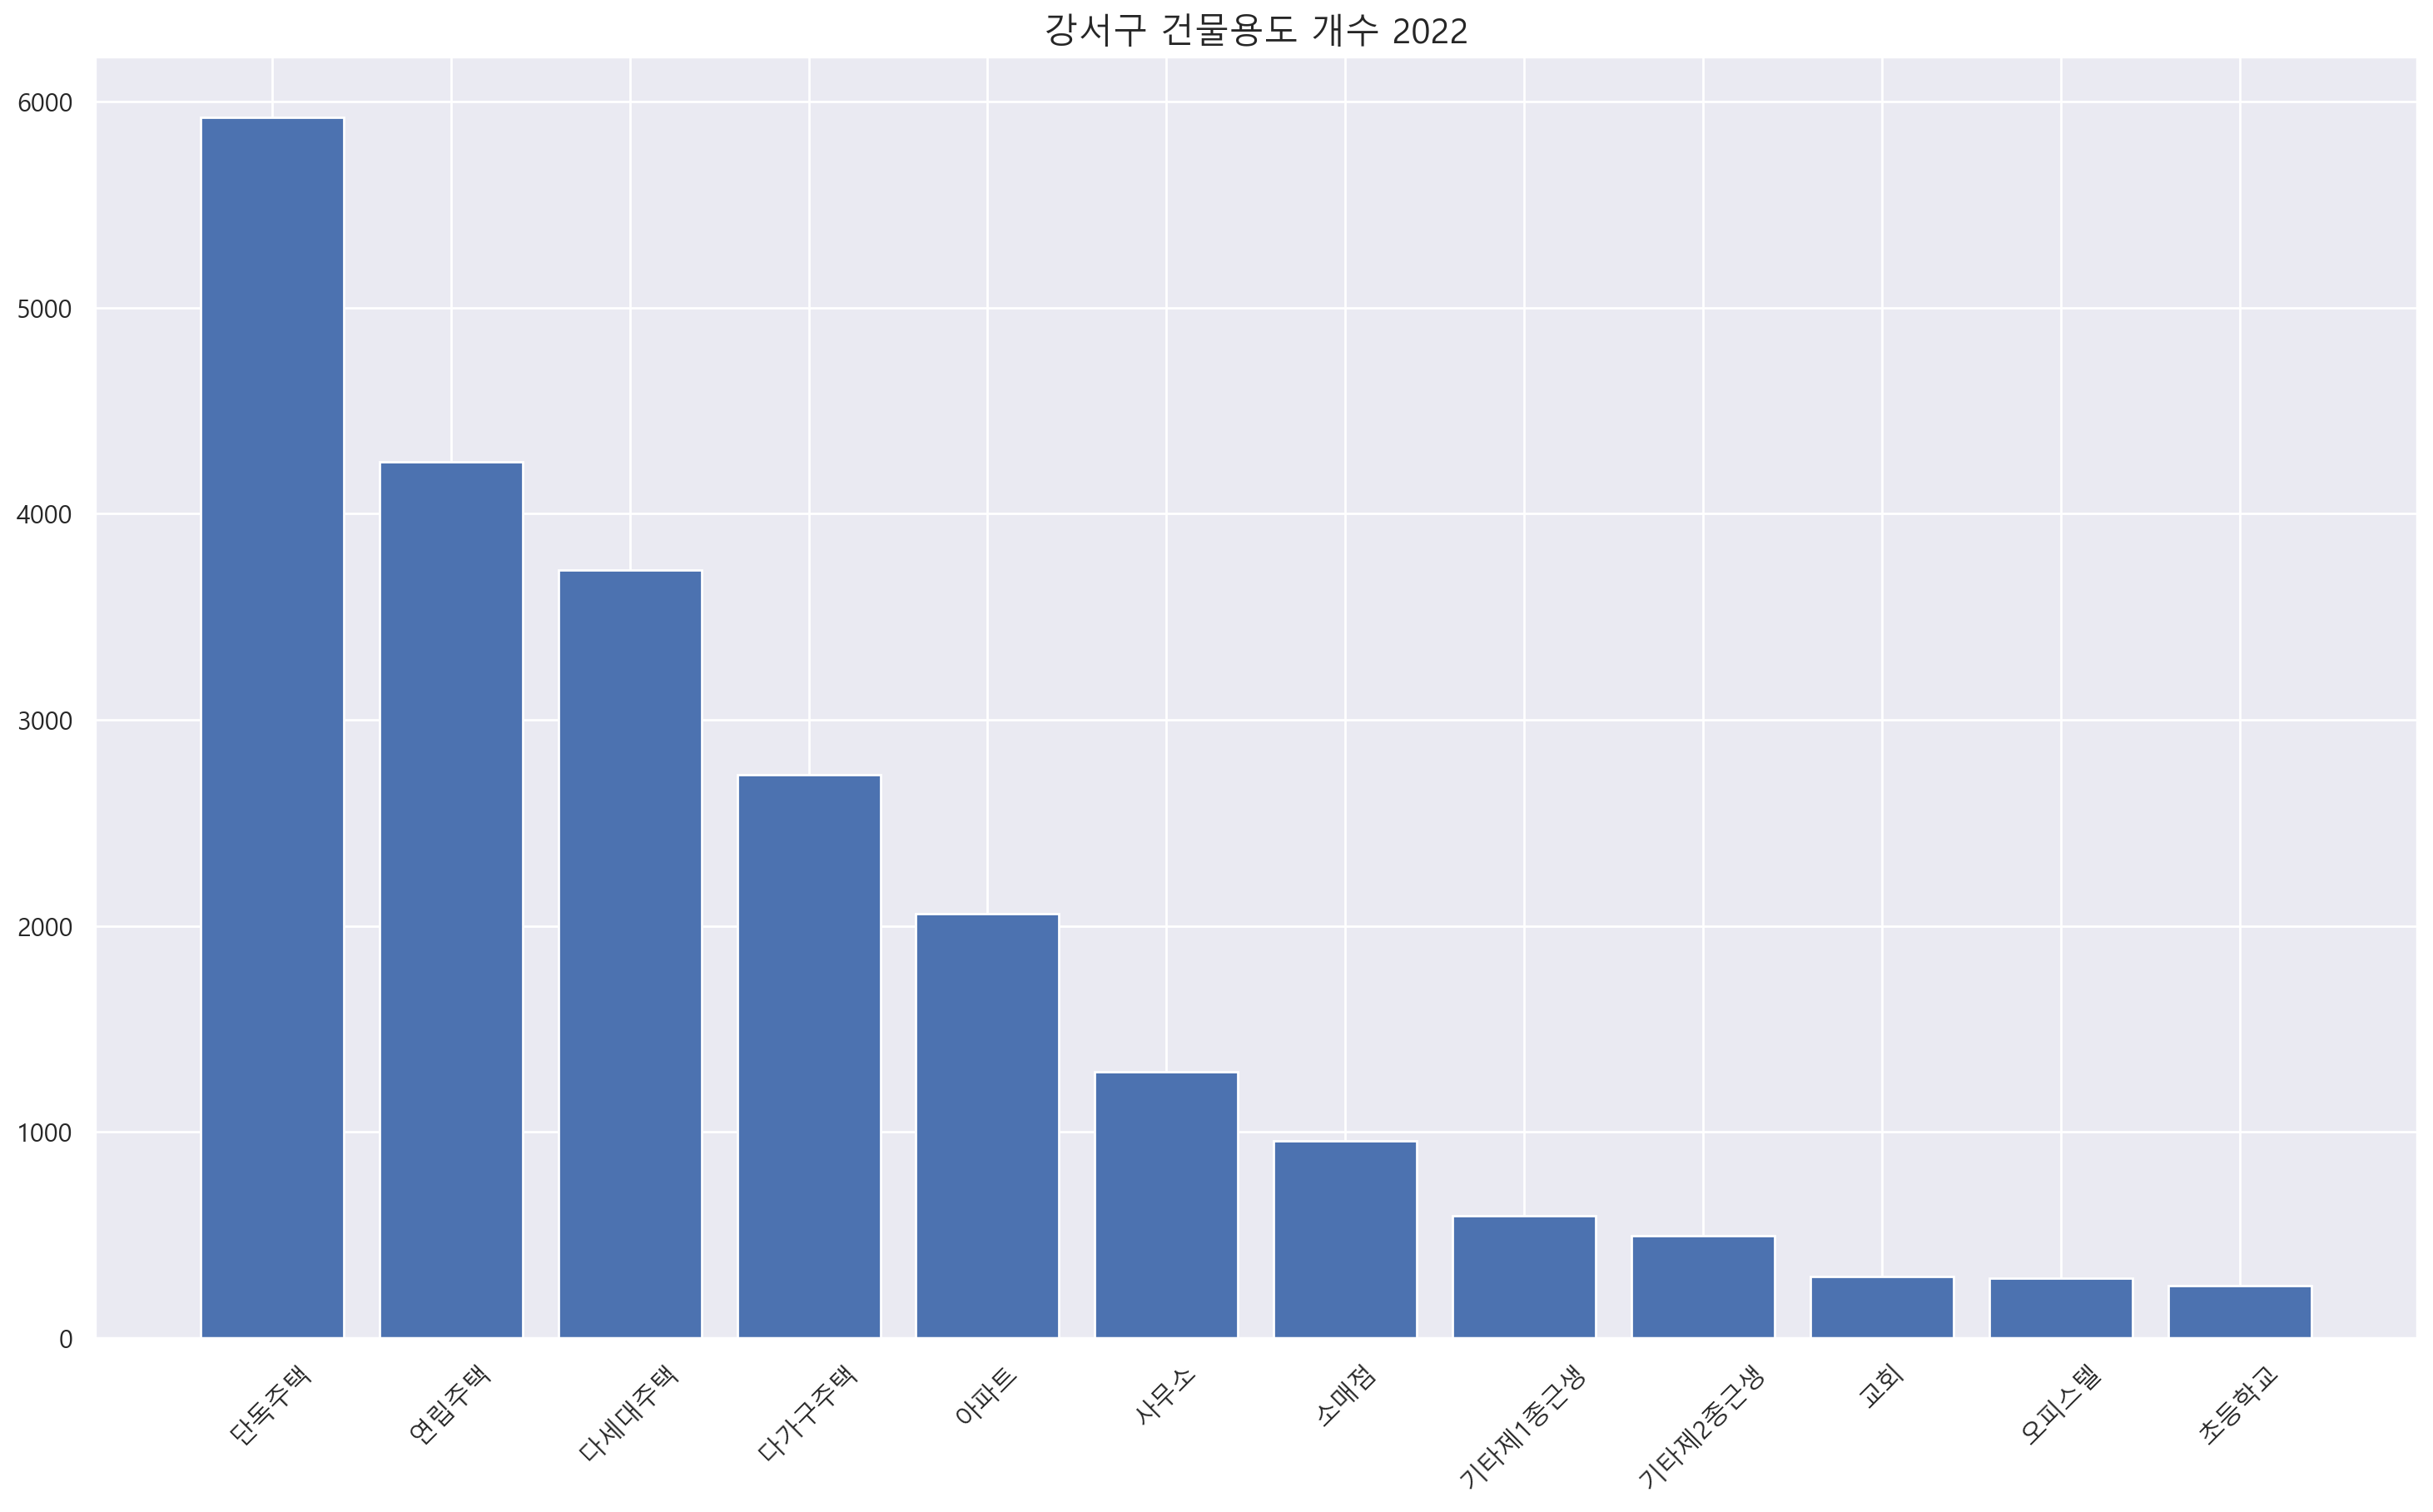

In [28]:
tmp_s = gangseo['건물용도명'].value_counts().loc[gangseo['건물용도명'].value_counts() > 200]
tmp_df = pd.DataFrame({'건물용도명':tmp_s.index, '개수': tmp_s.values})
title = '강서구 건물용도 개수 2022'

plt.figure(figsize=figure_size)
plt.bar(tmp_df['건물용도명'], tmp_df['개수'])
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/건물/동별 건물 용도/{title}.png')
plt.show()

In [29]:
# plt.pie(tmp_df['개수'], labels=tmp_df['건물용도명'], autopct='%.1f%%', startangle=90, counterclock=False)
# plt.title('강서구 건물용도별 비율 (200개 이상)')
# plt.xticks(rotation=90)
# plt.show()

In [30]:
# set(gangseo['읍면동명'])

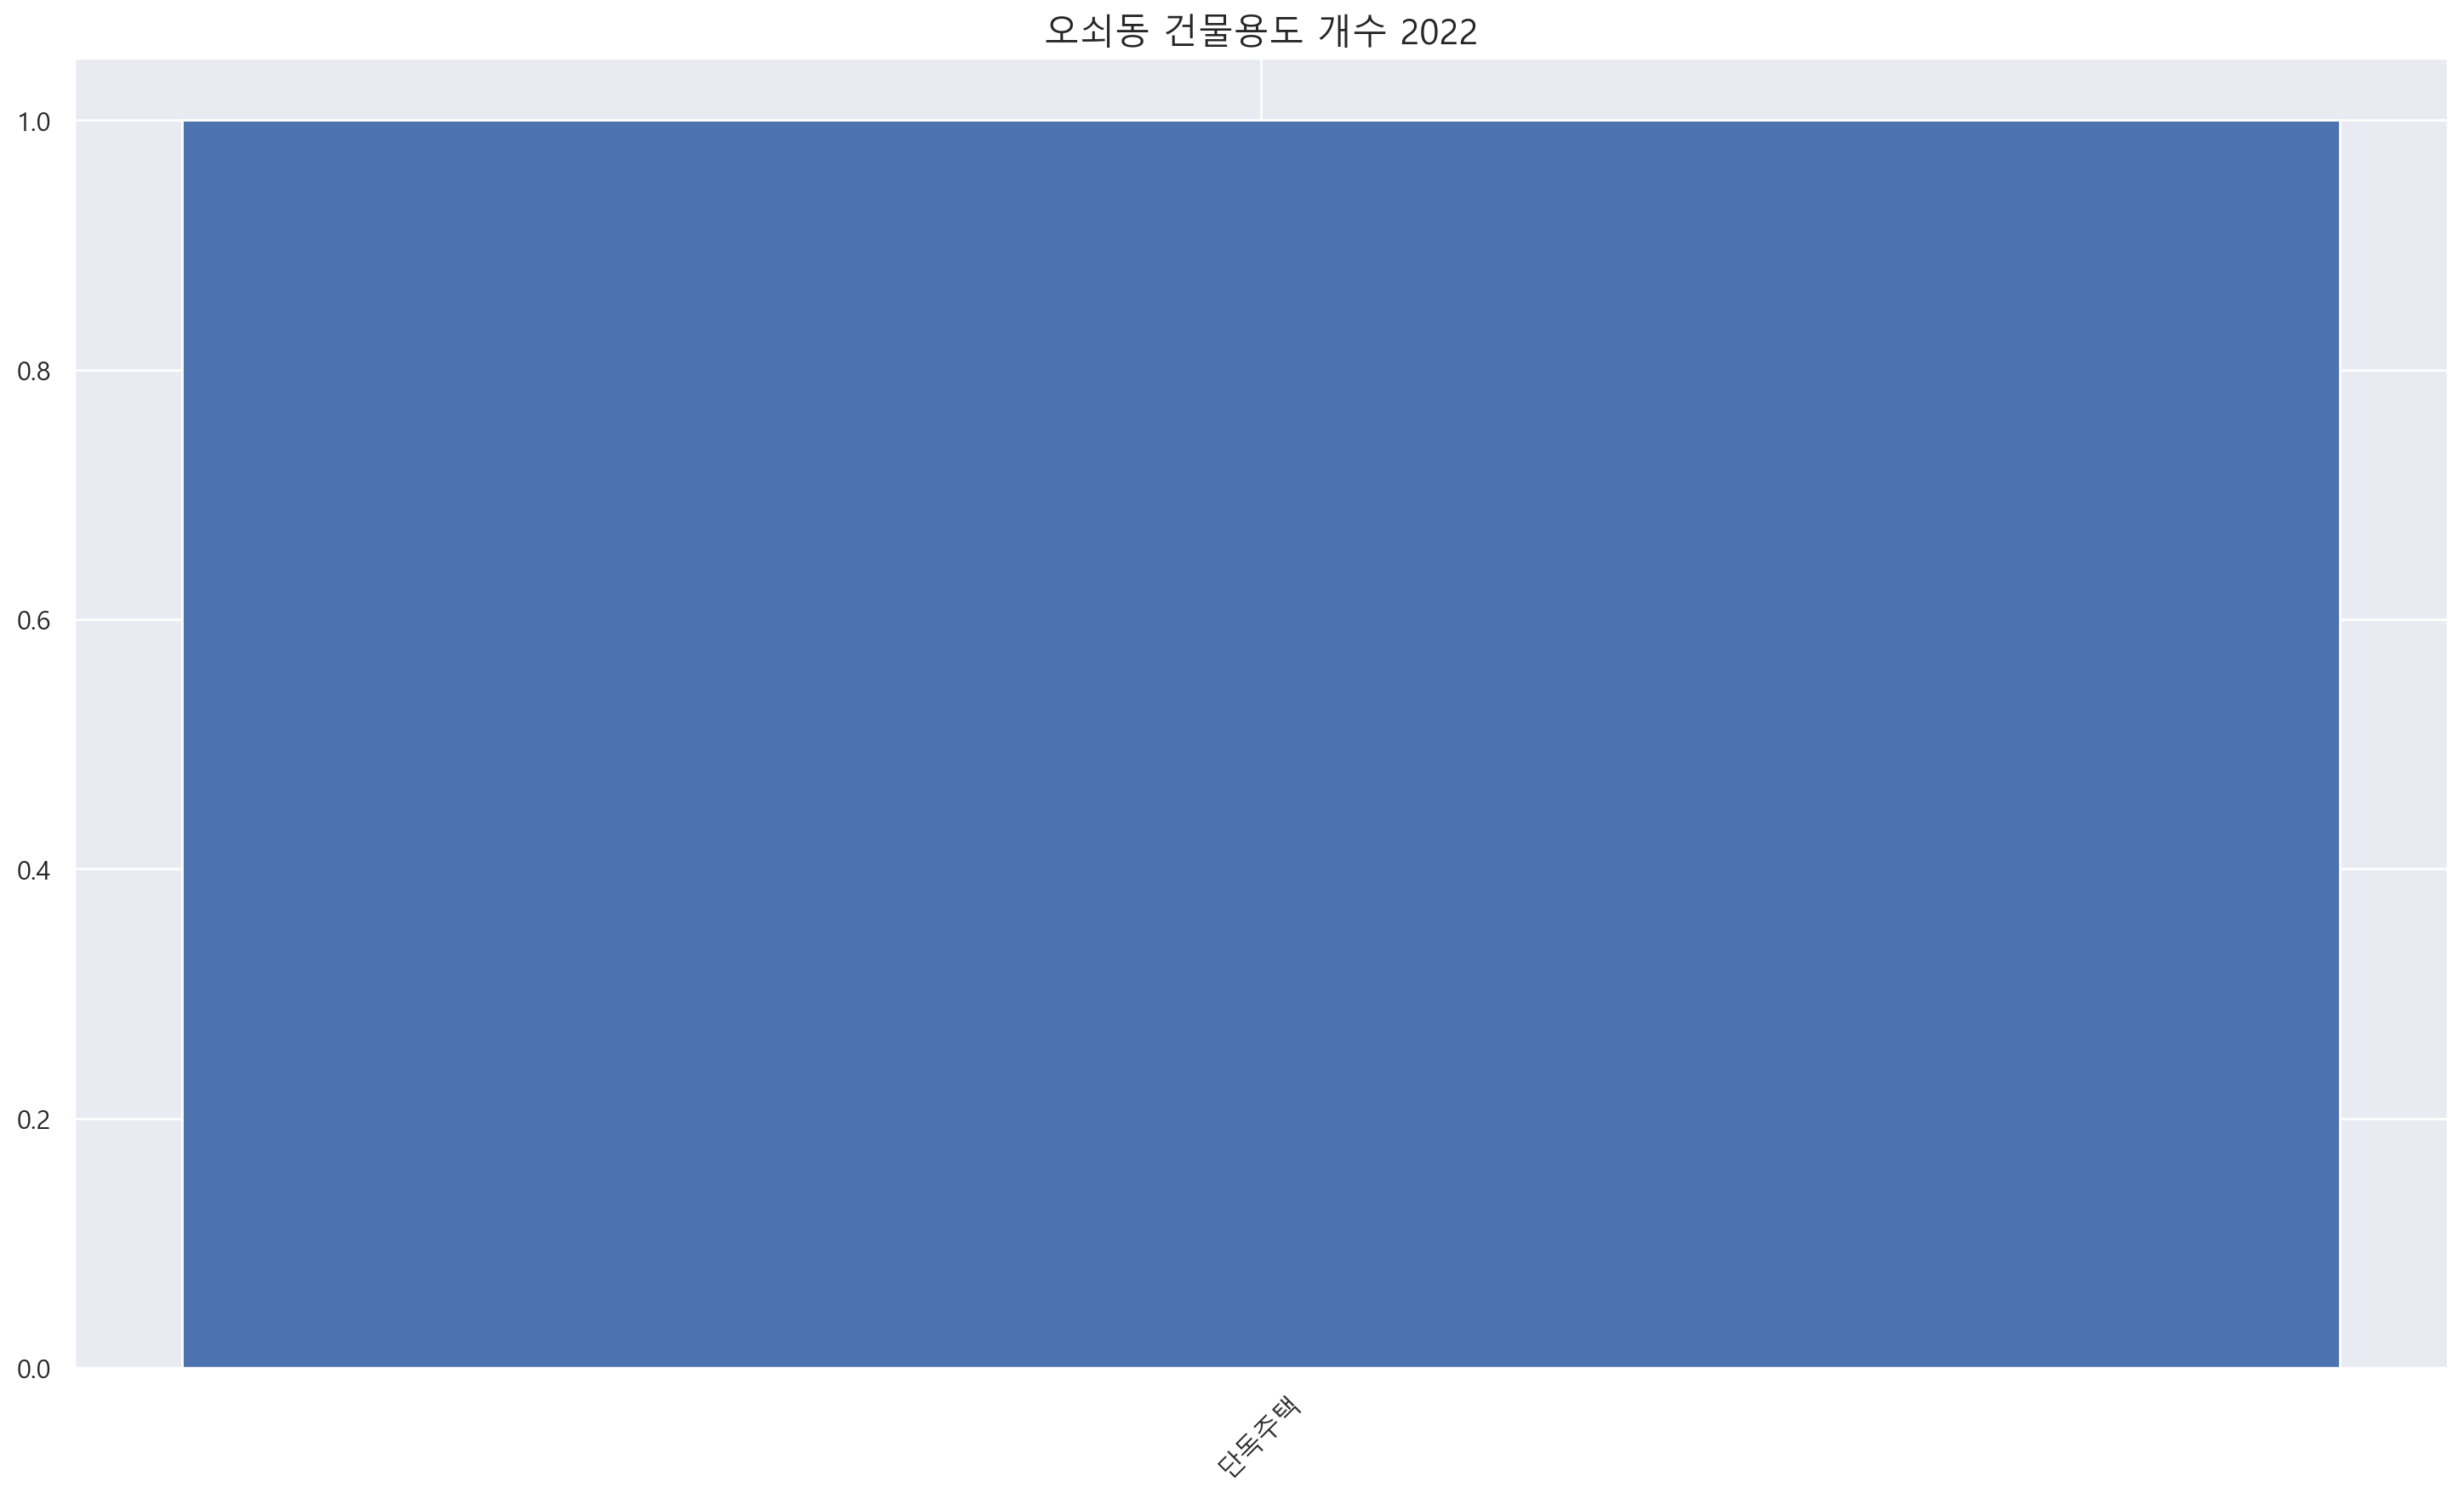

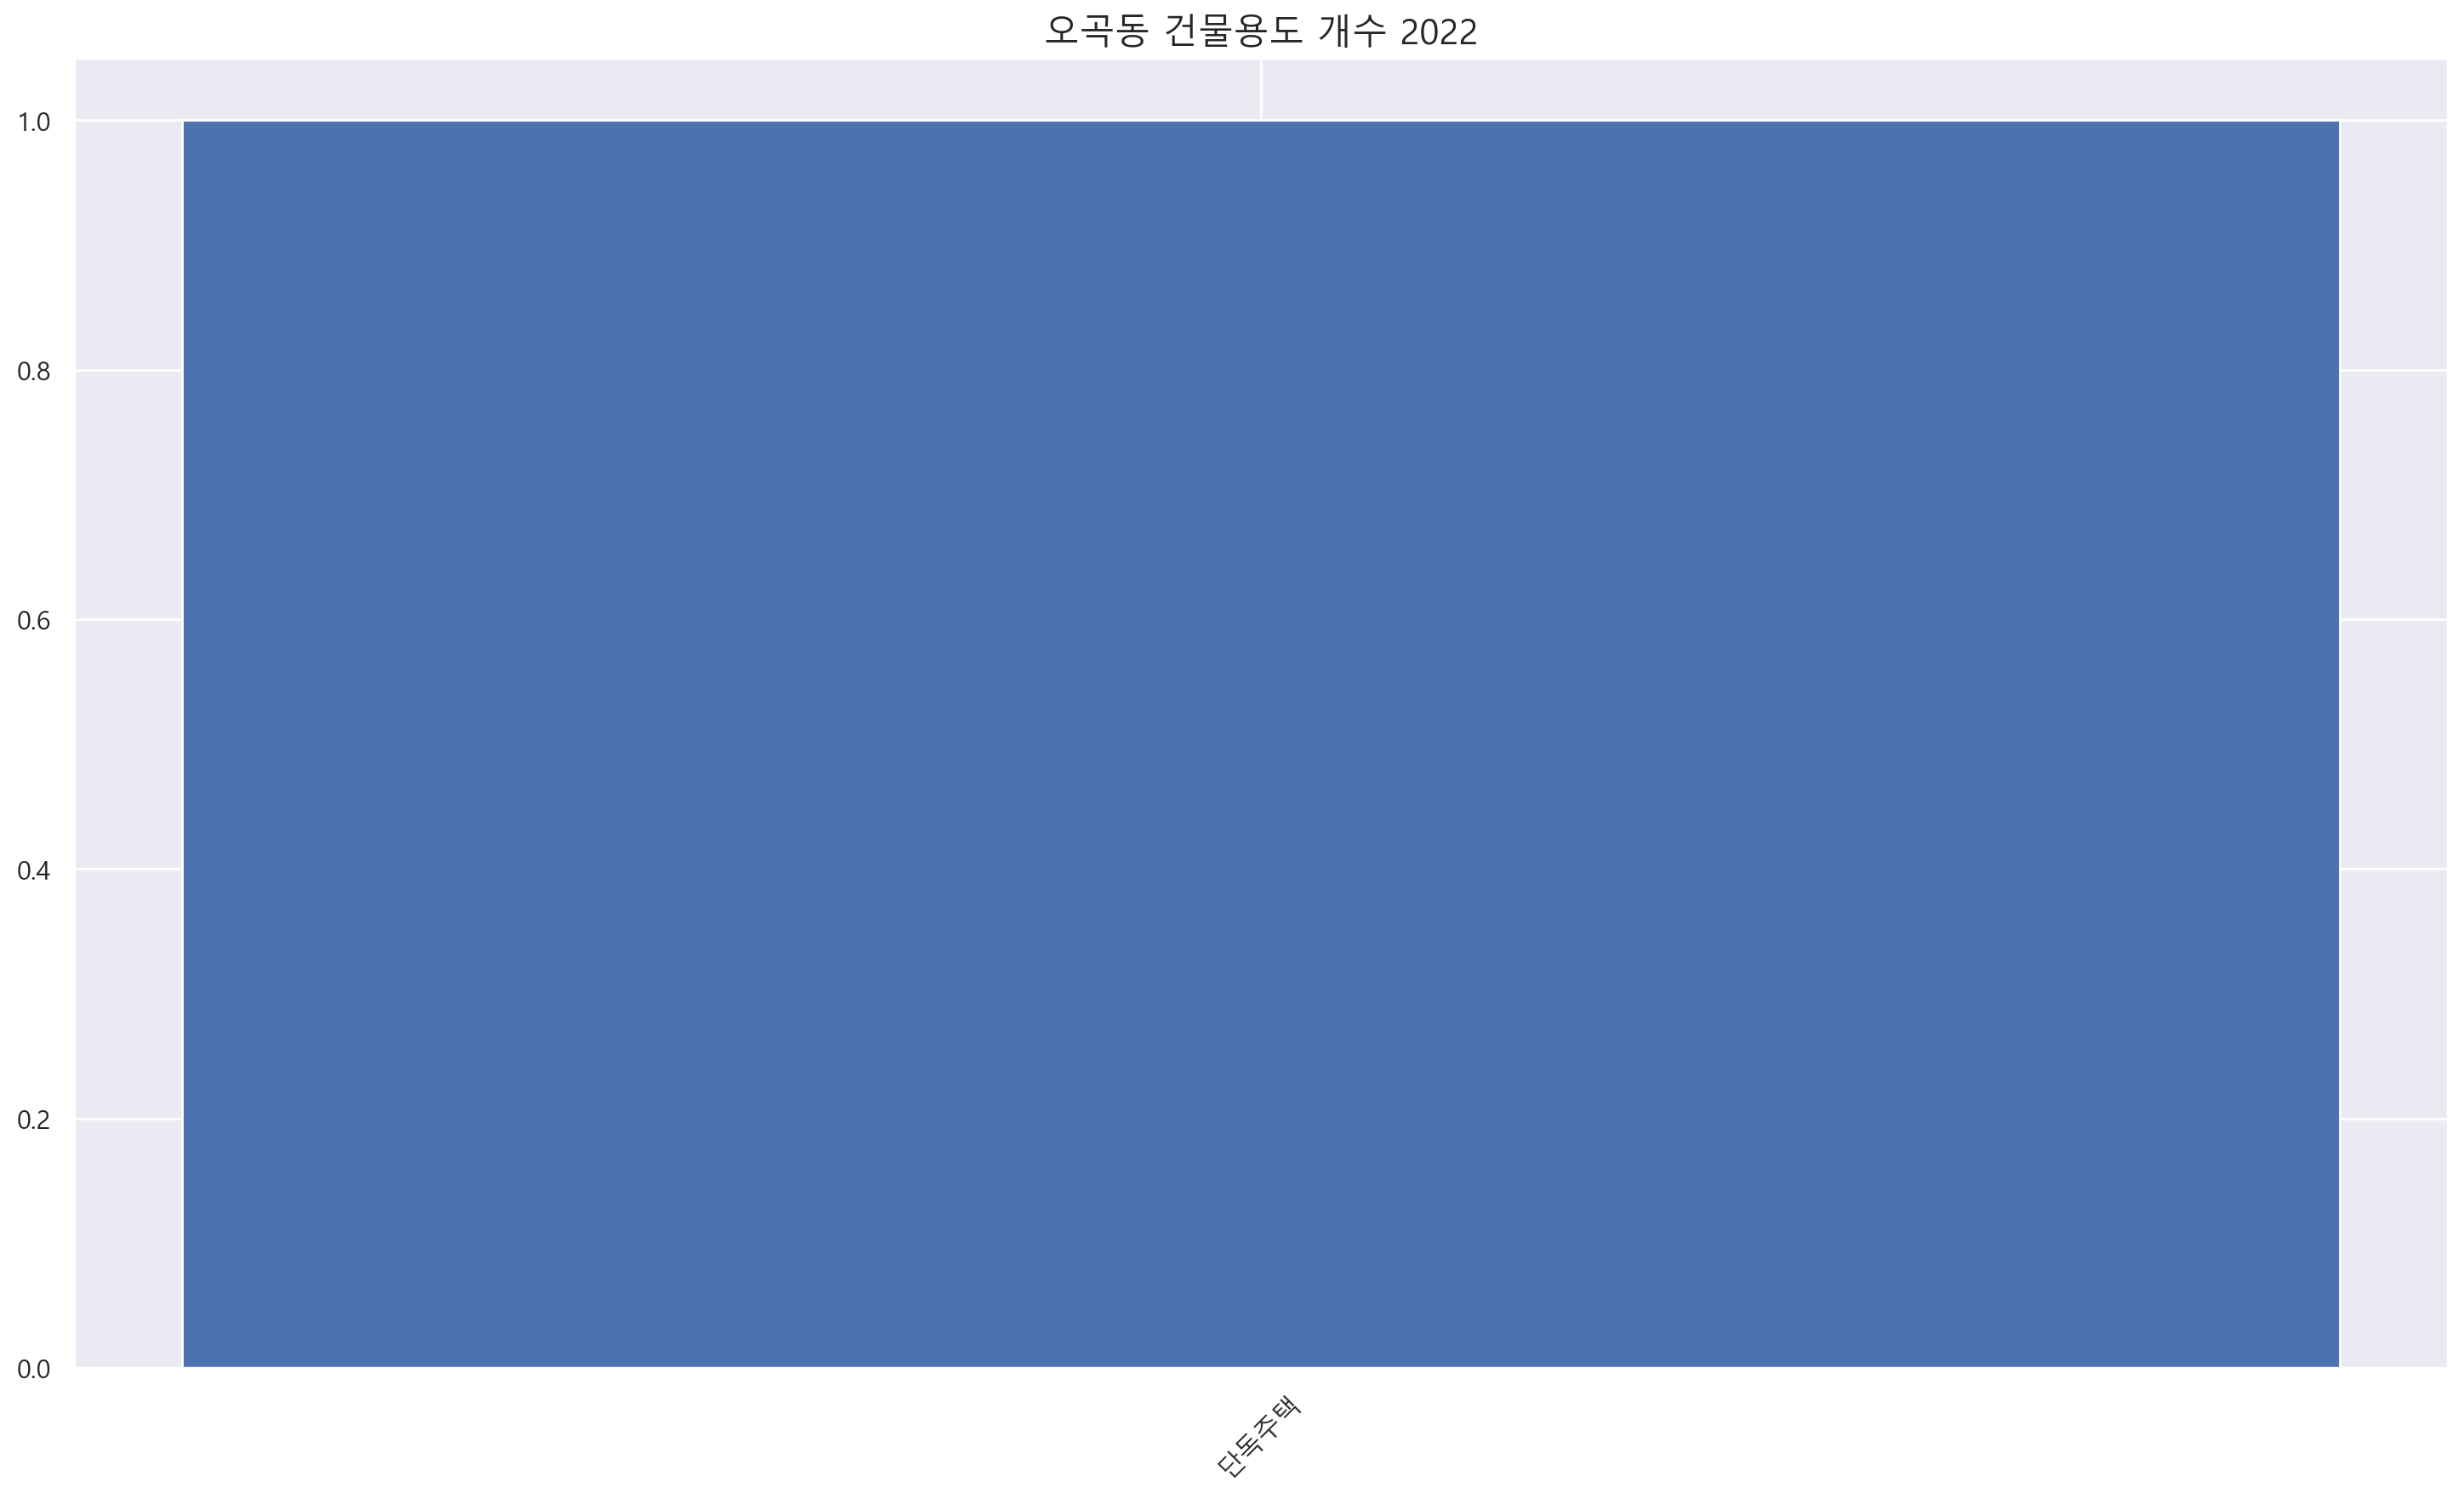

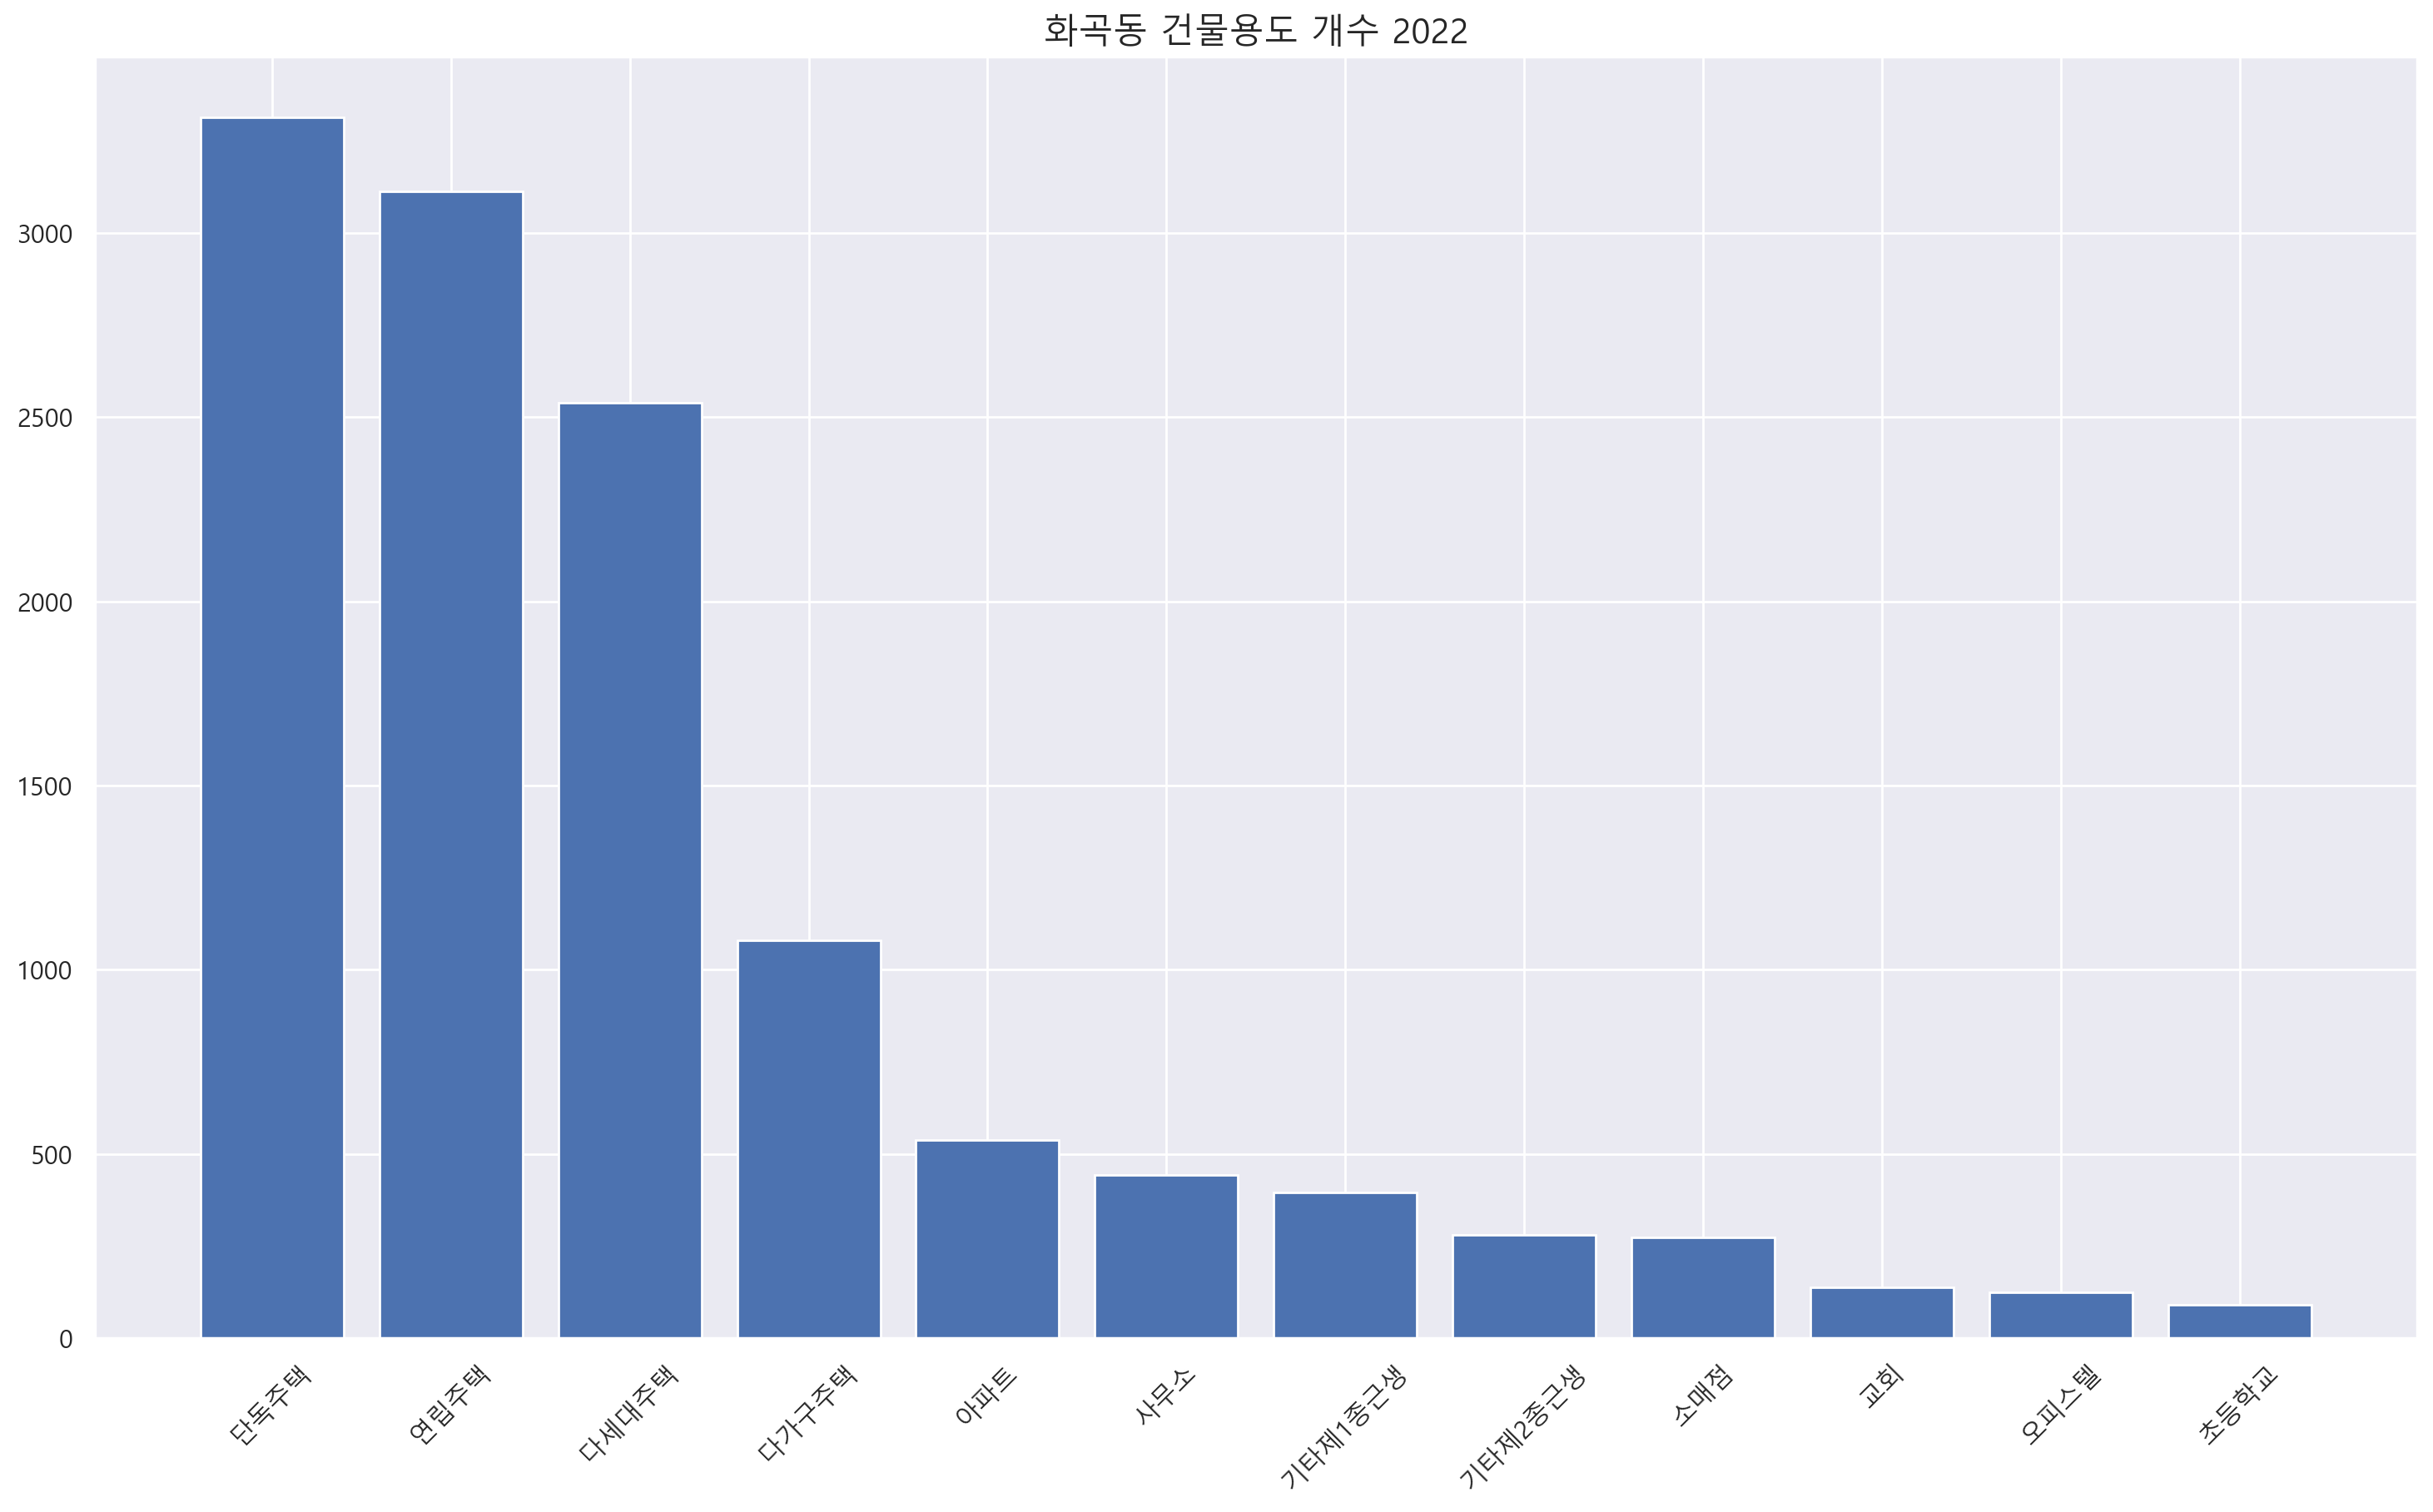

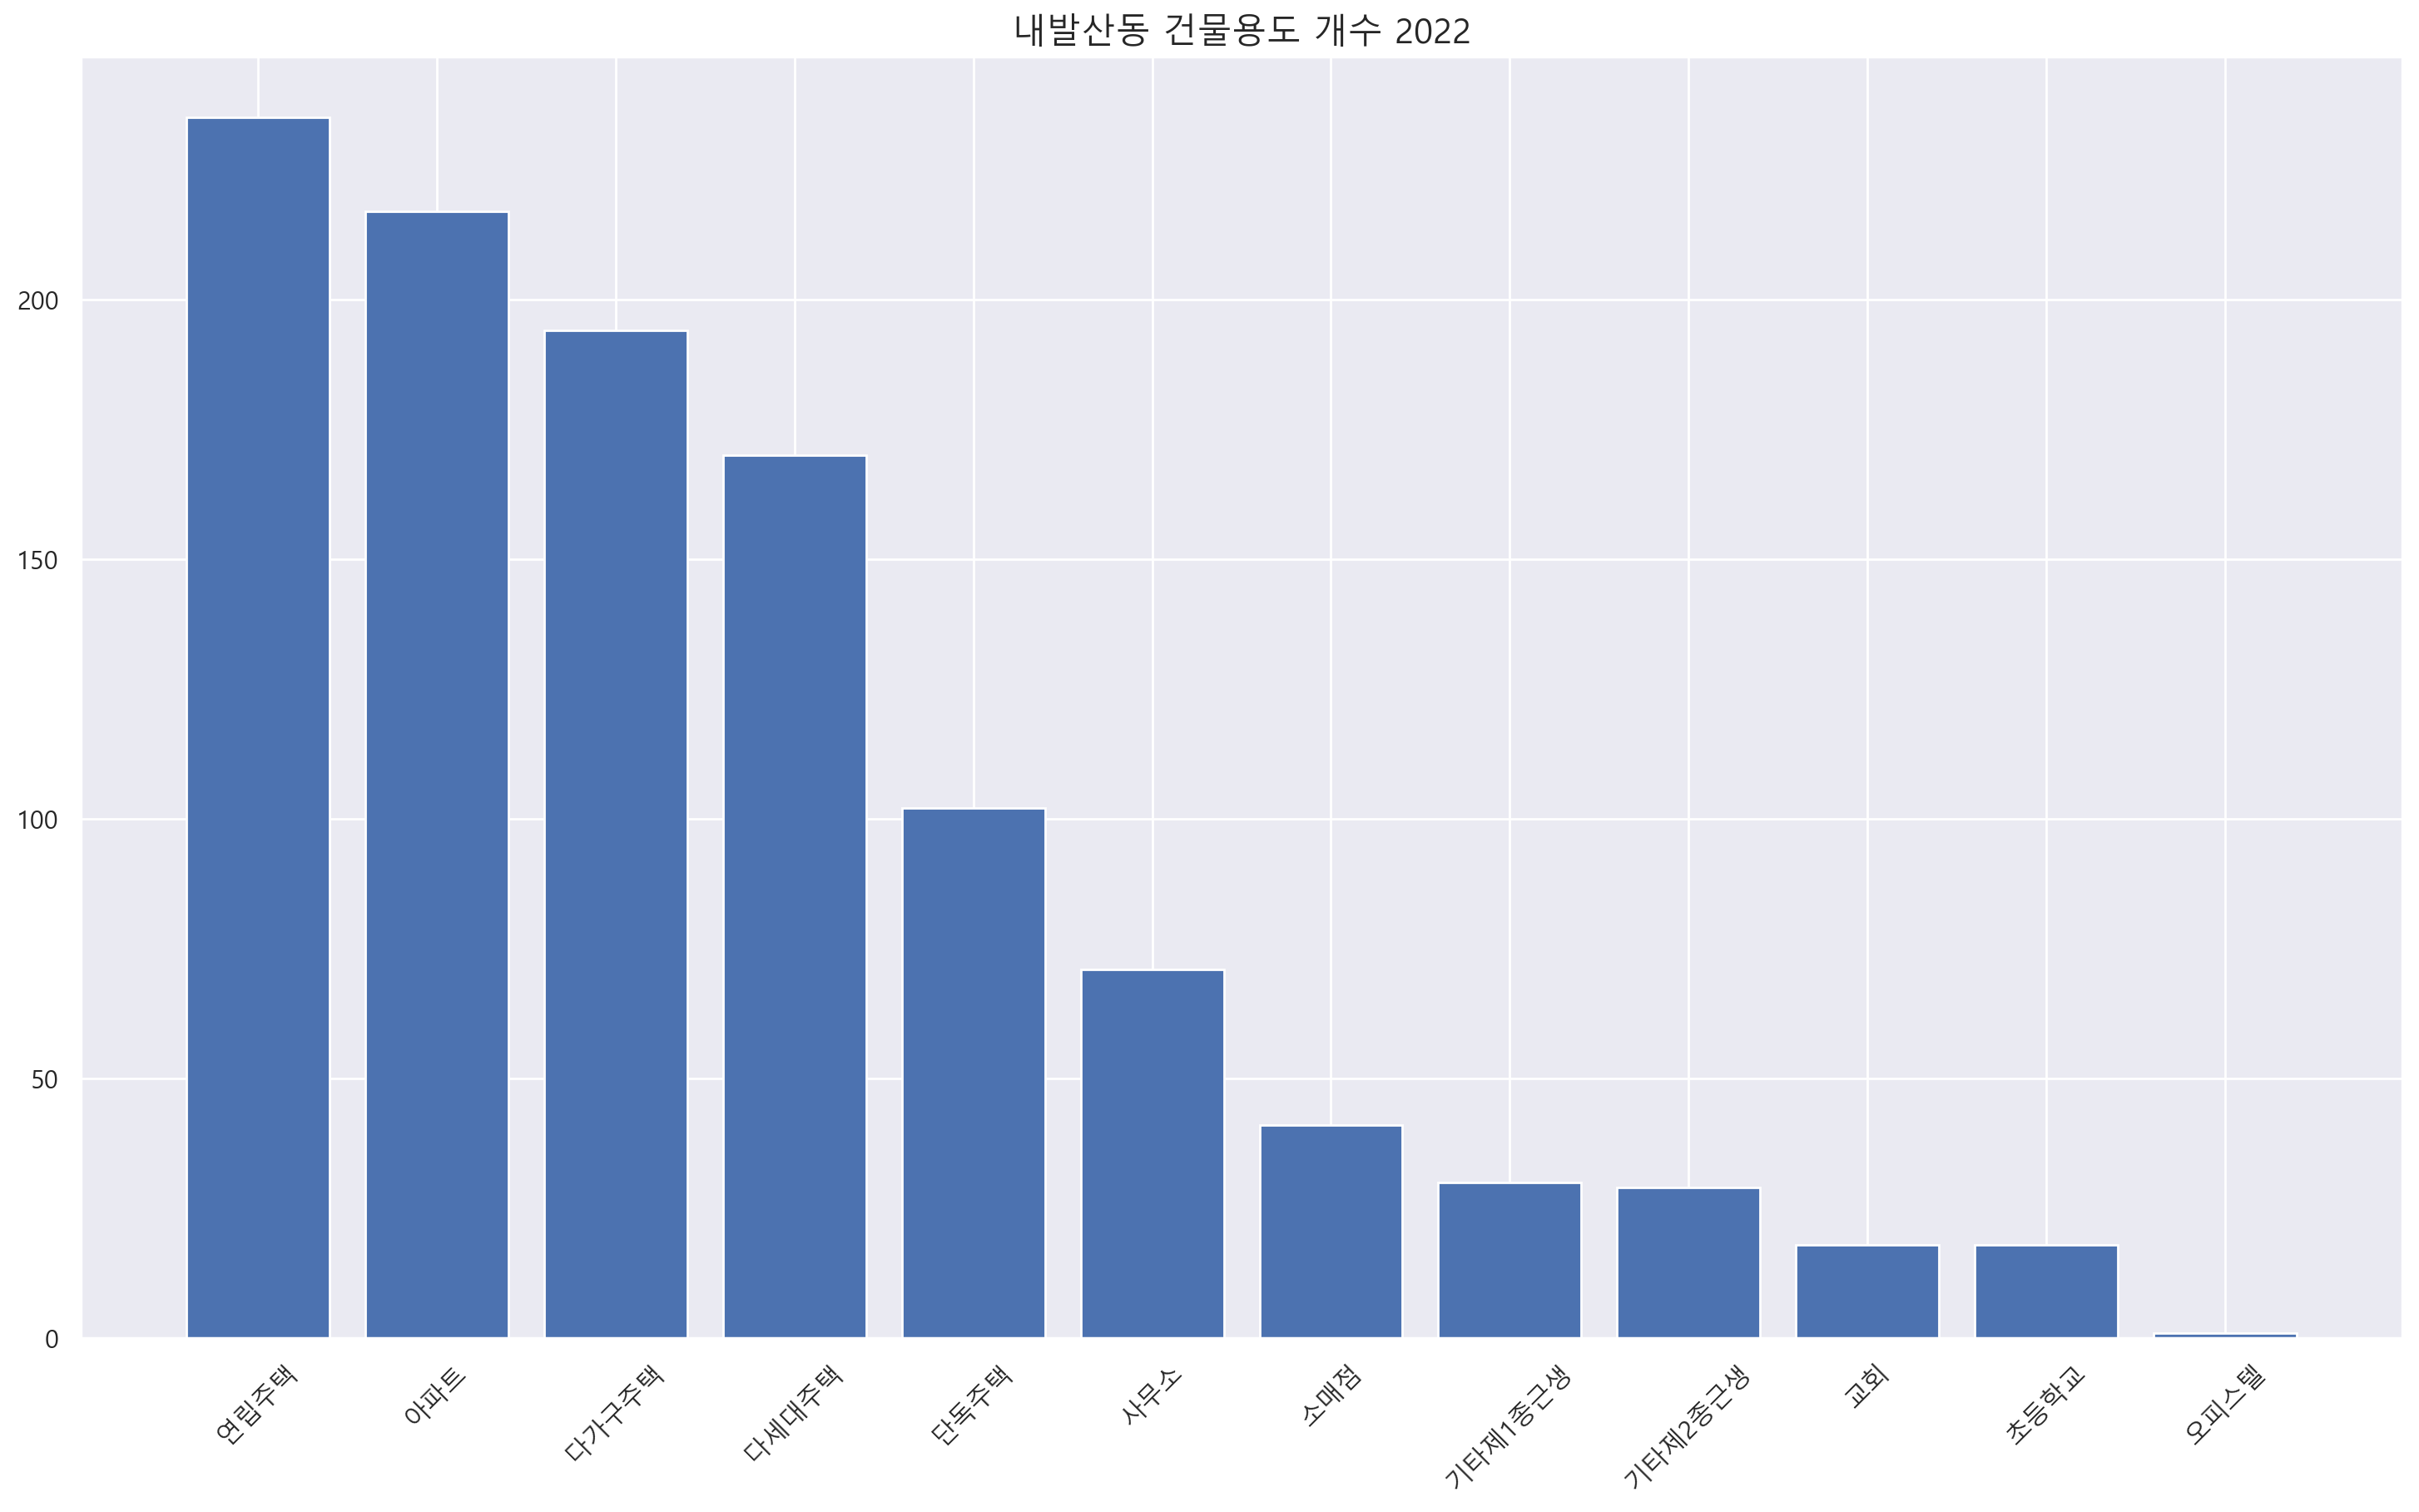

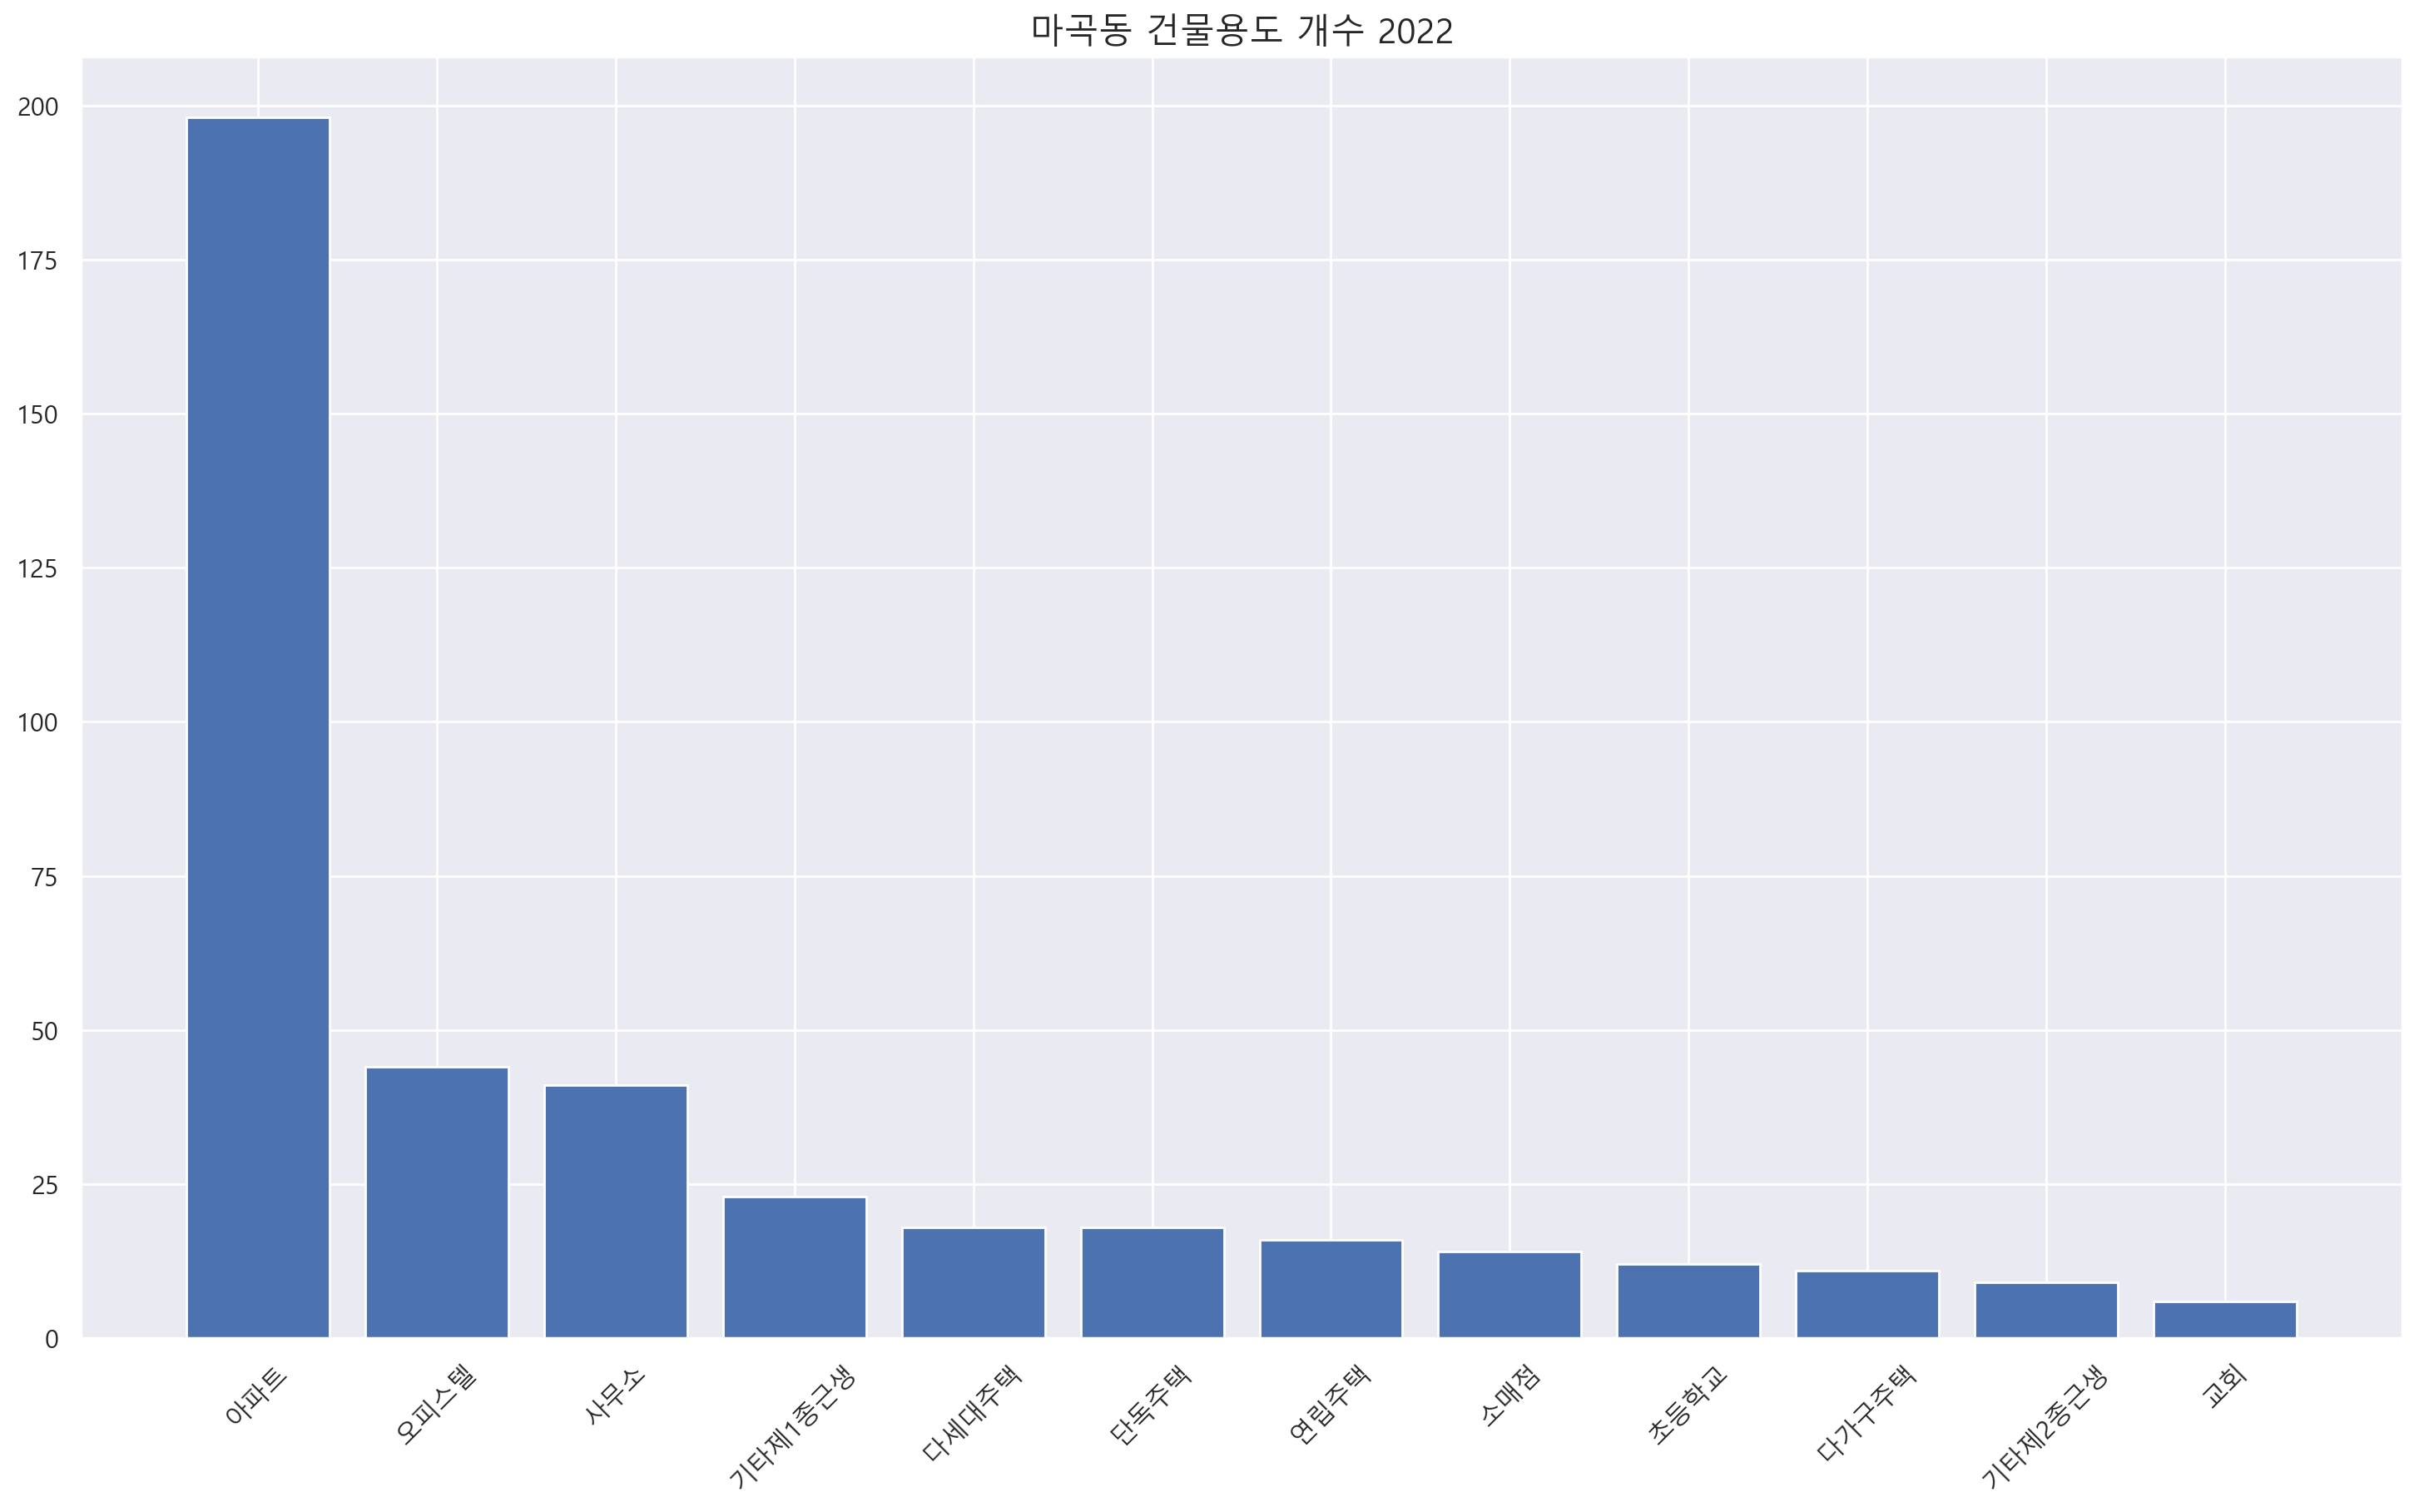

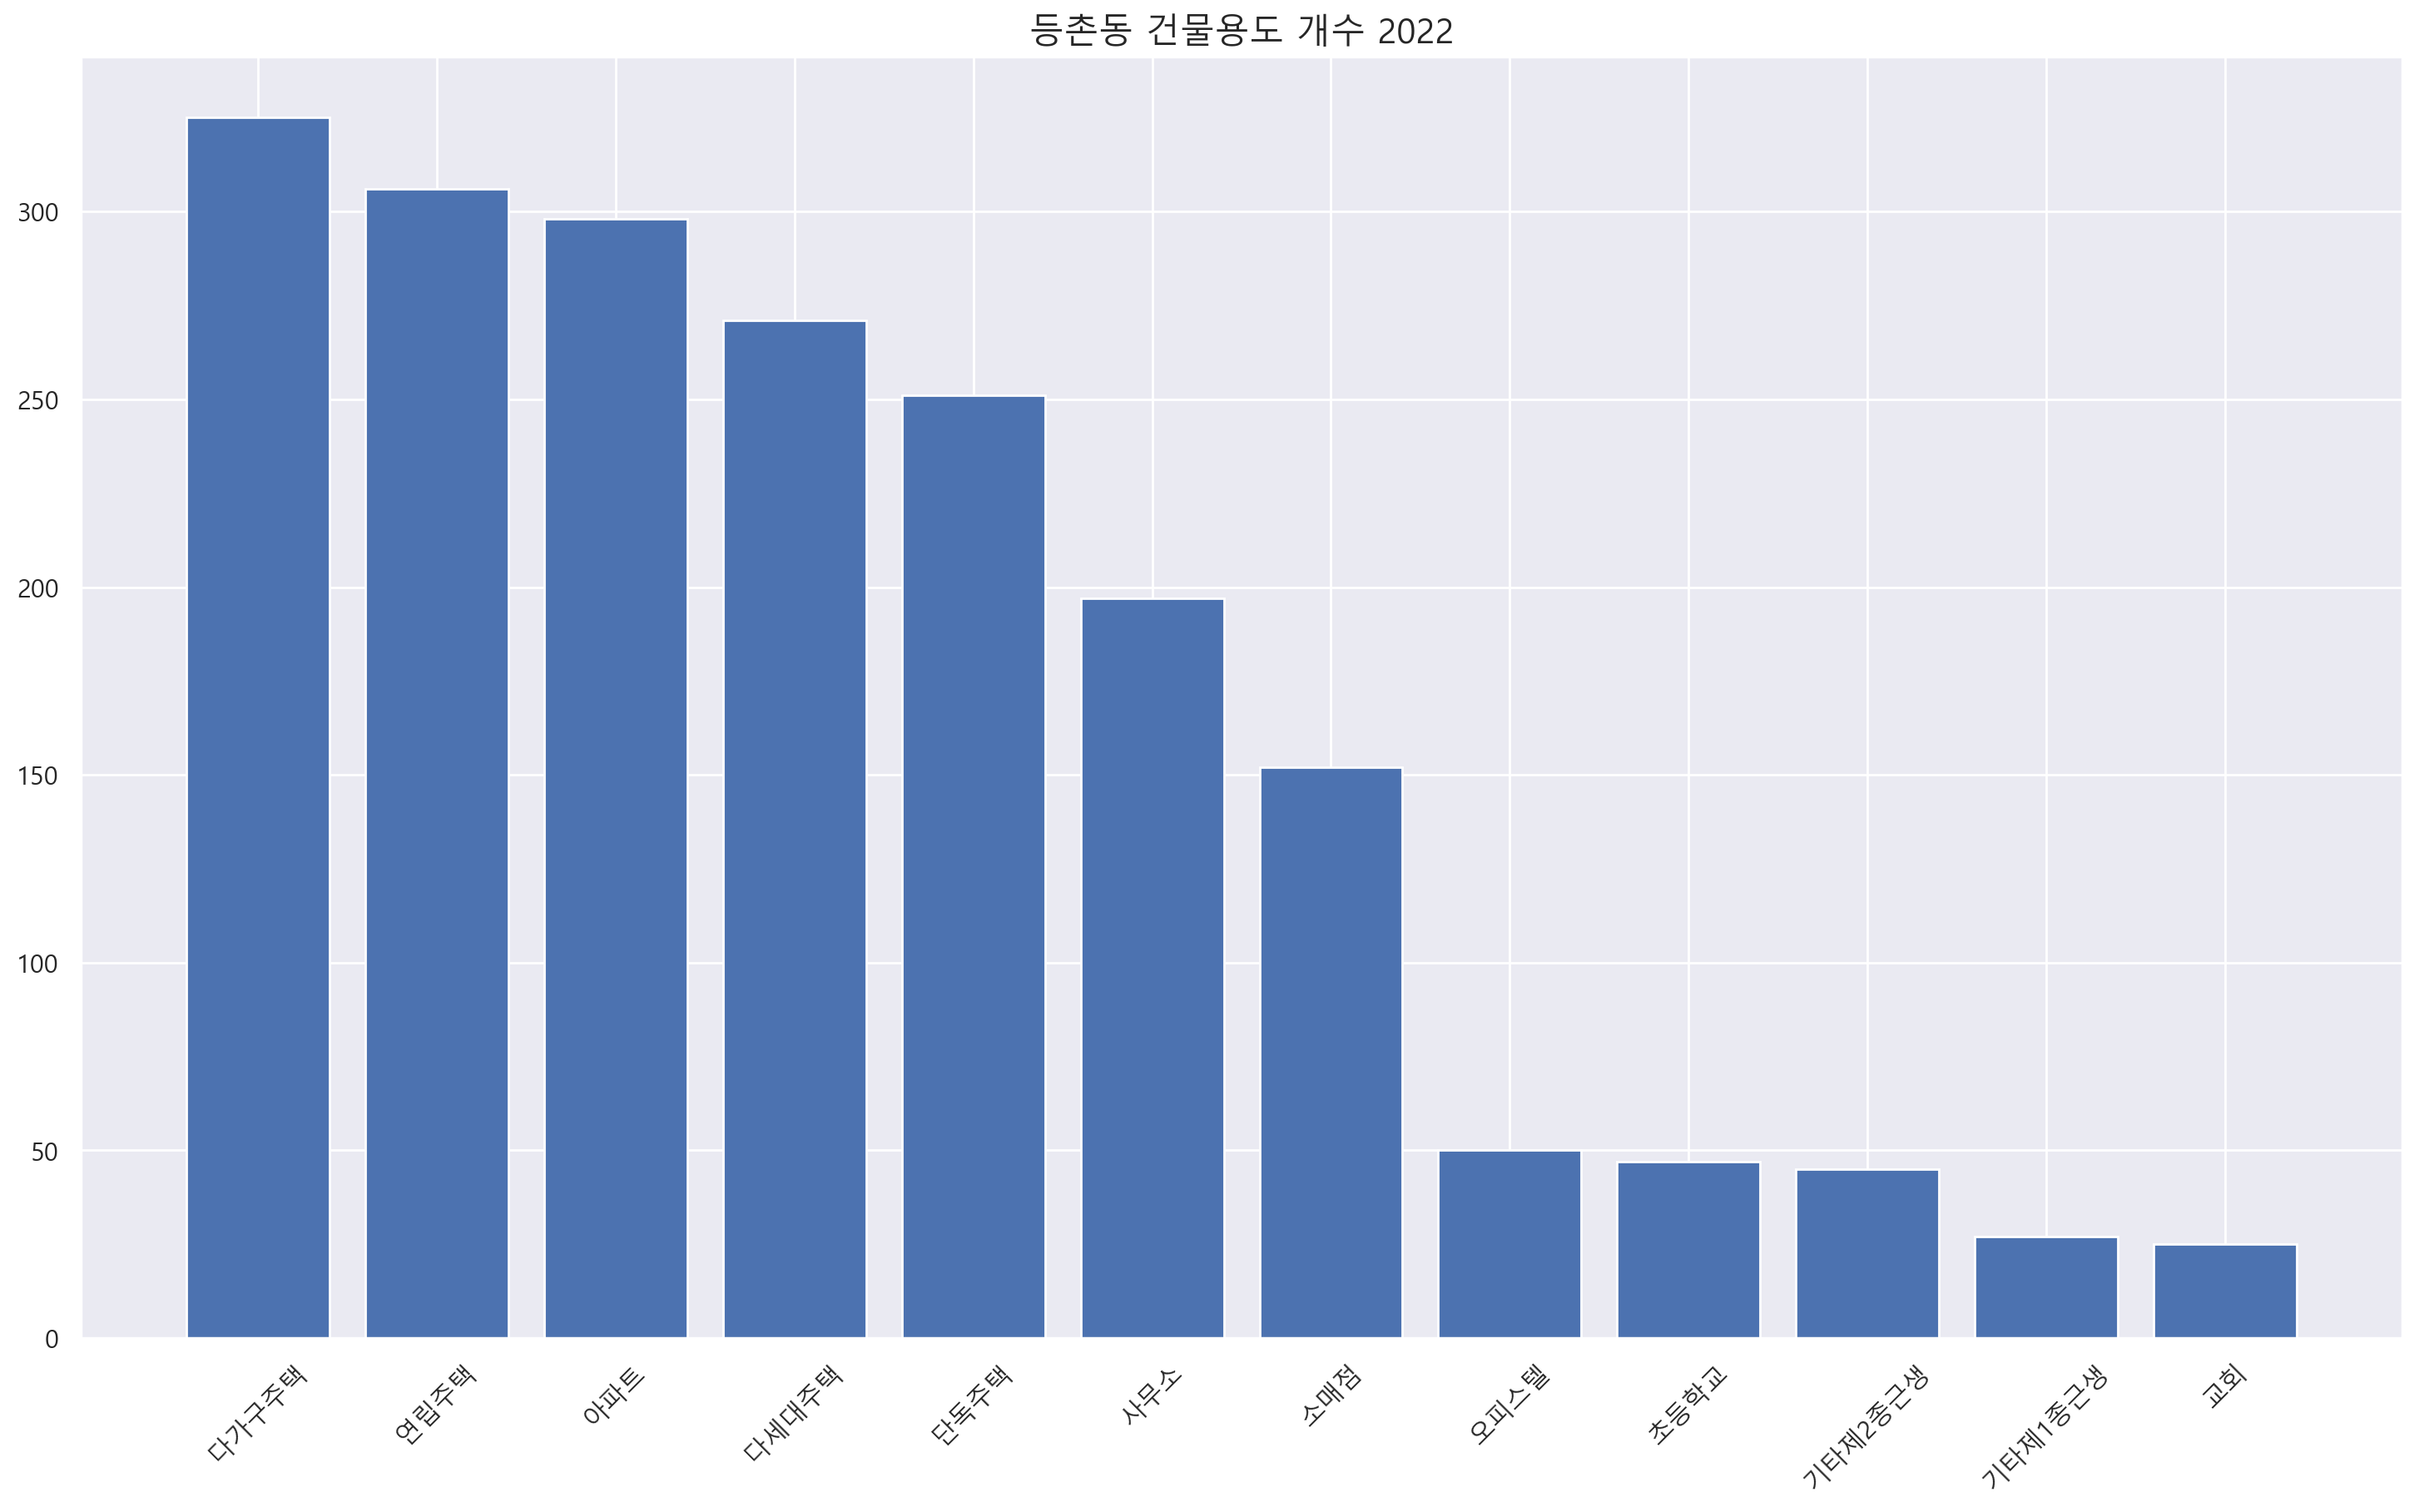

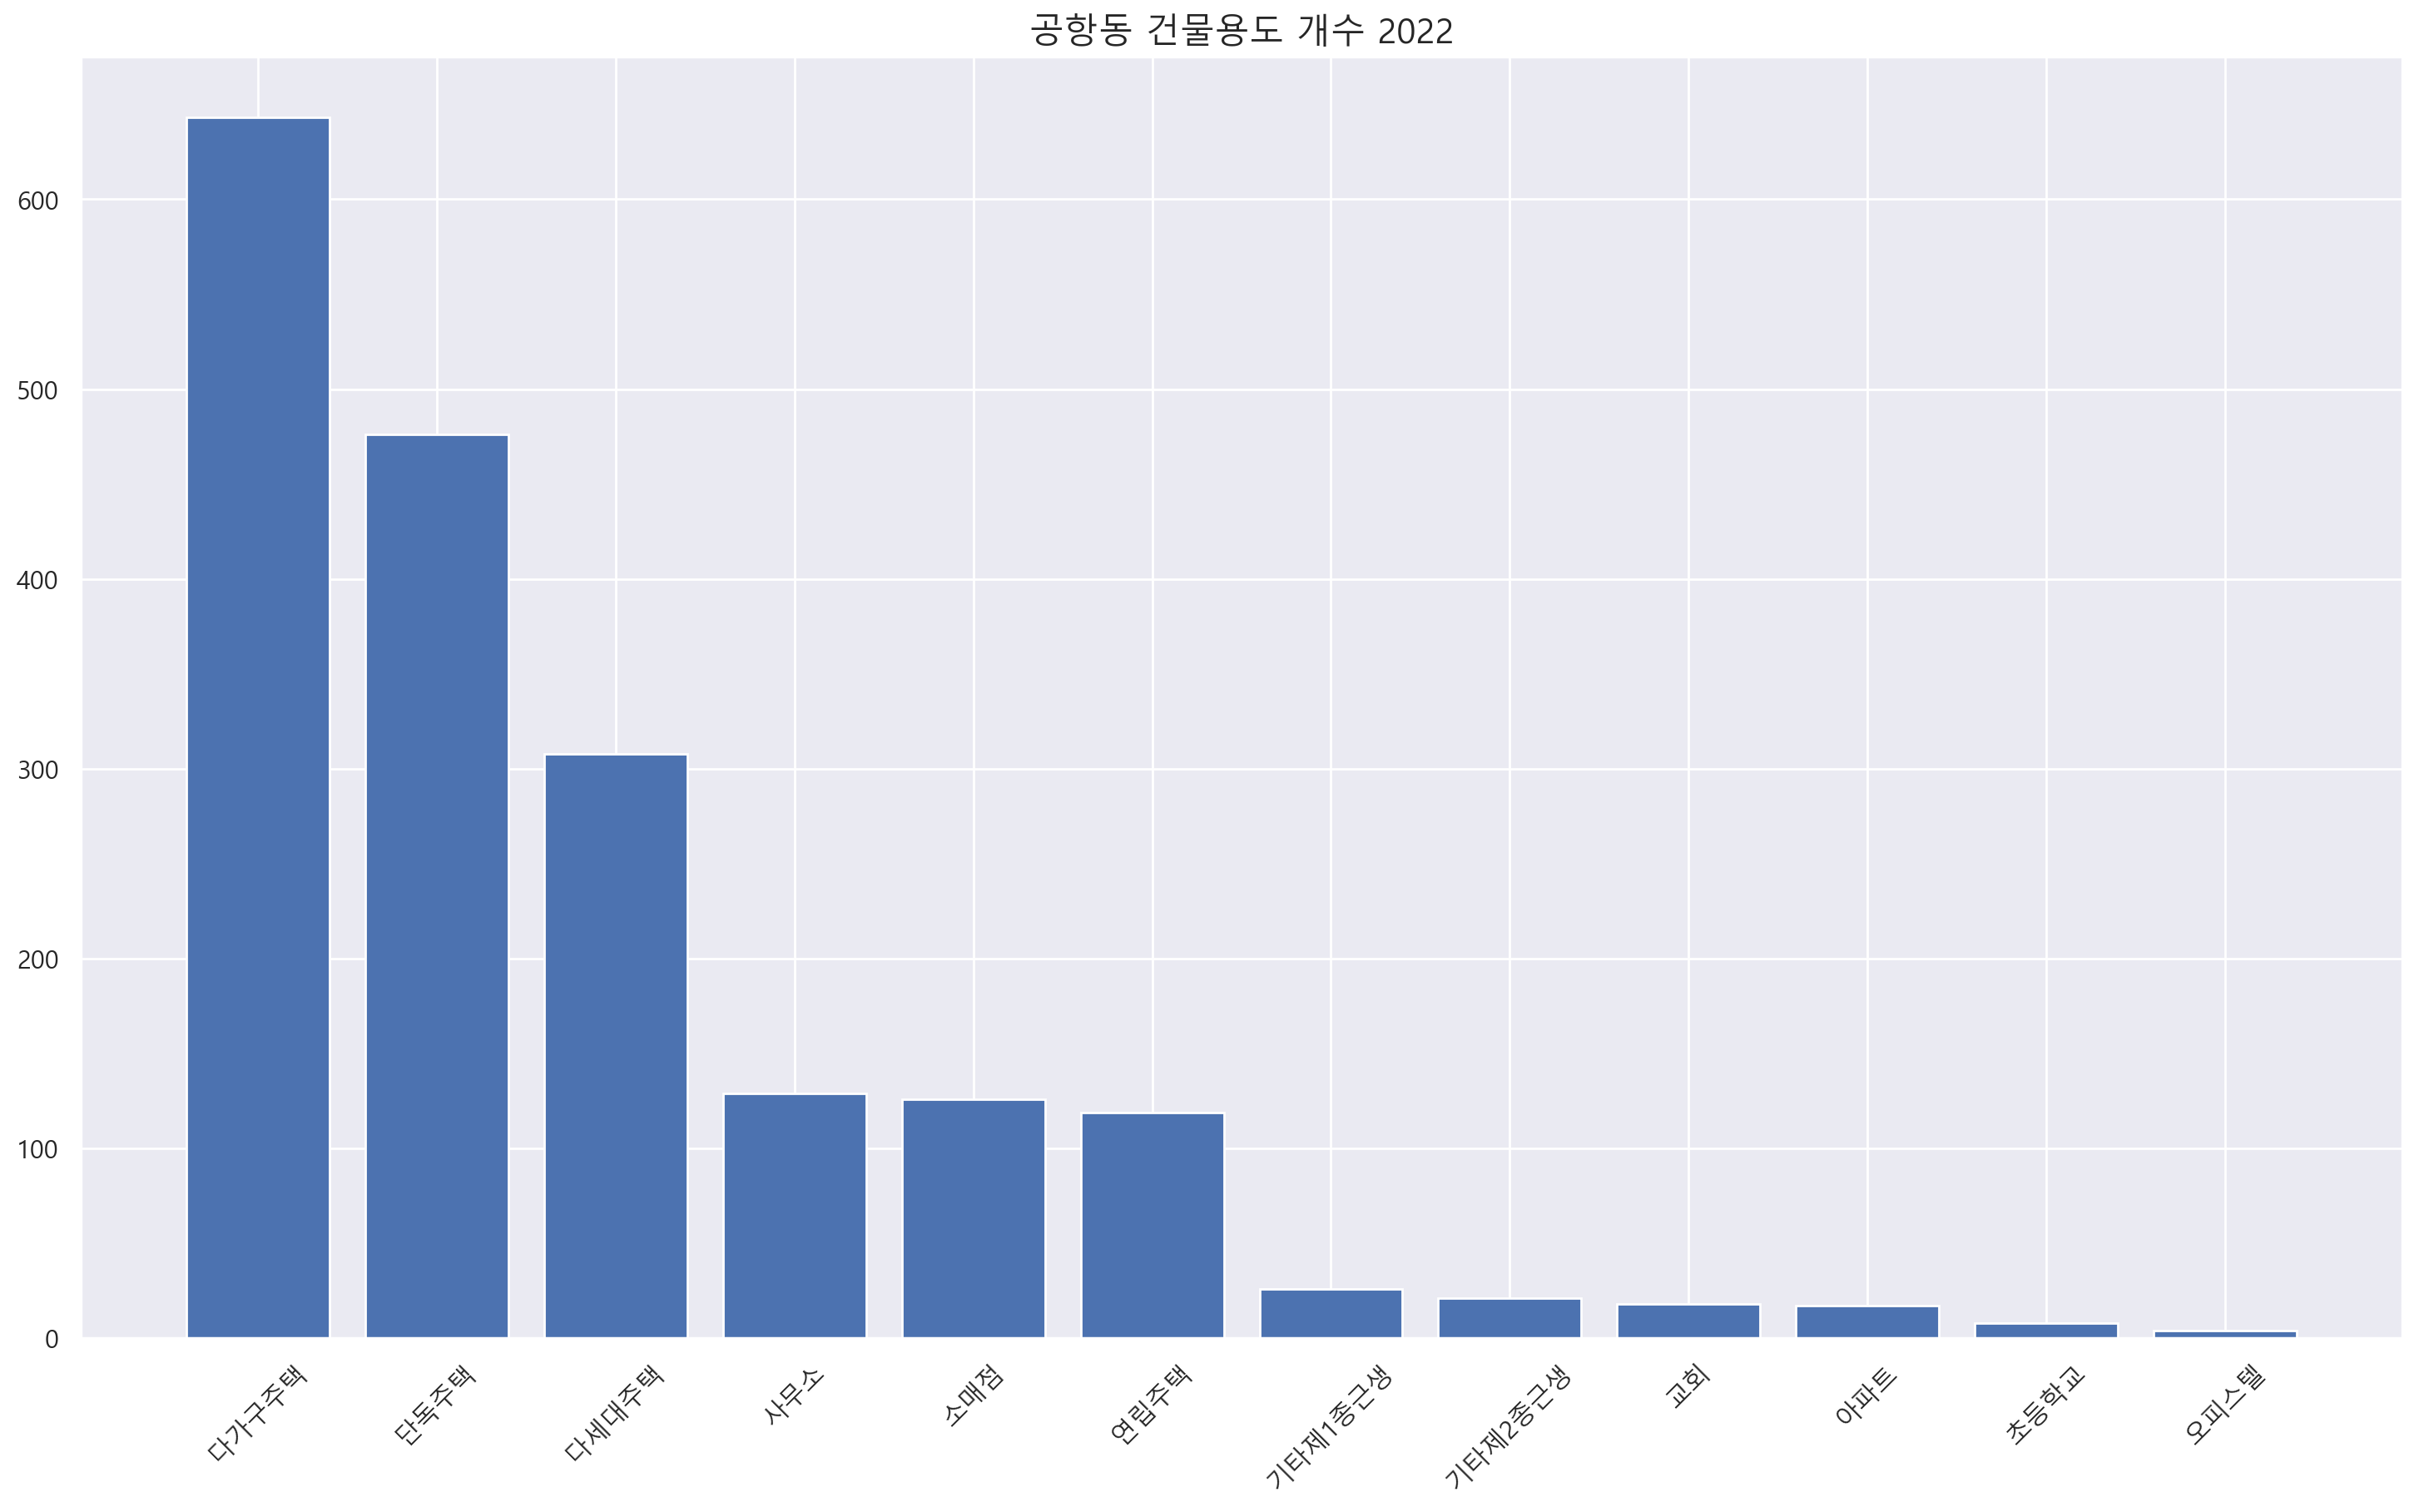

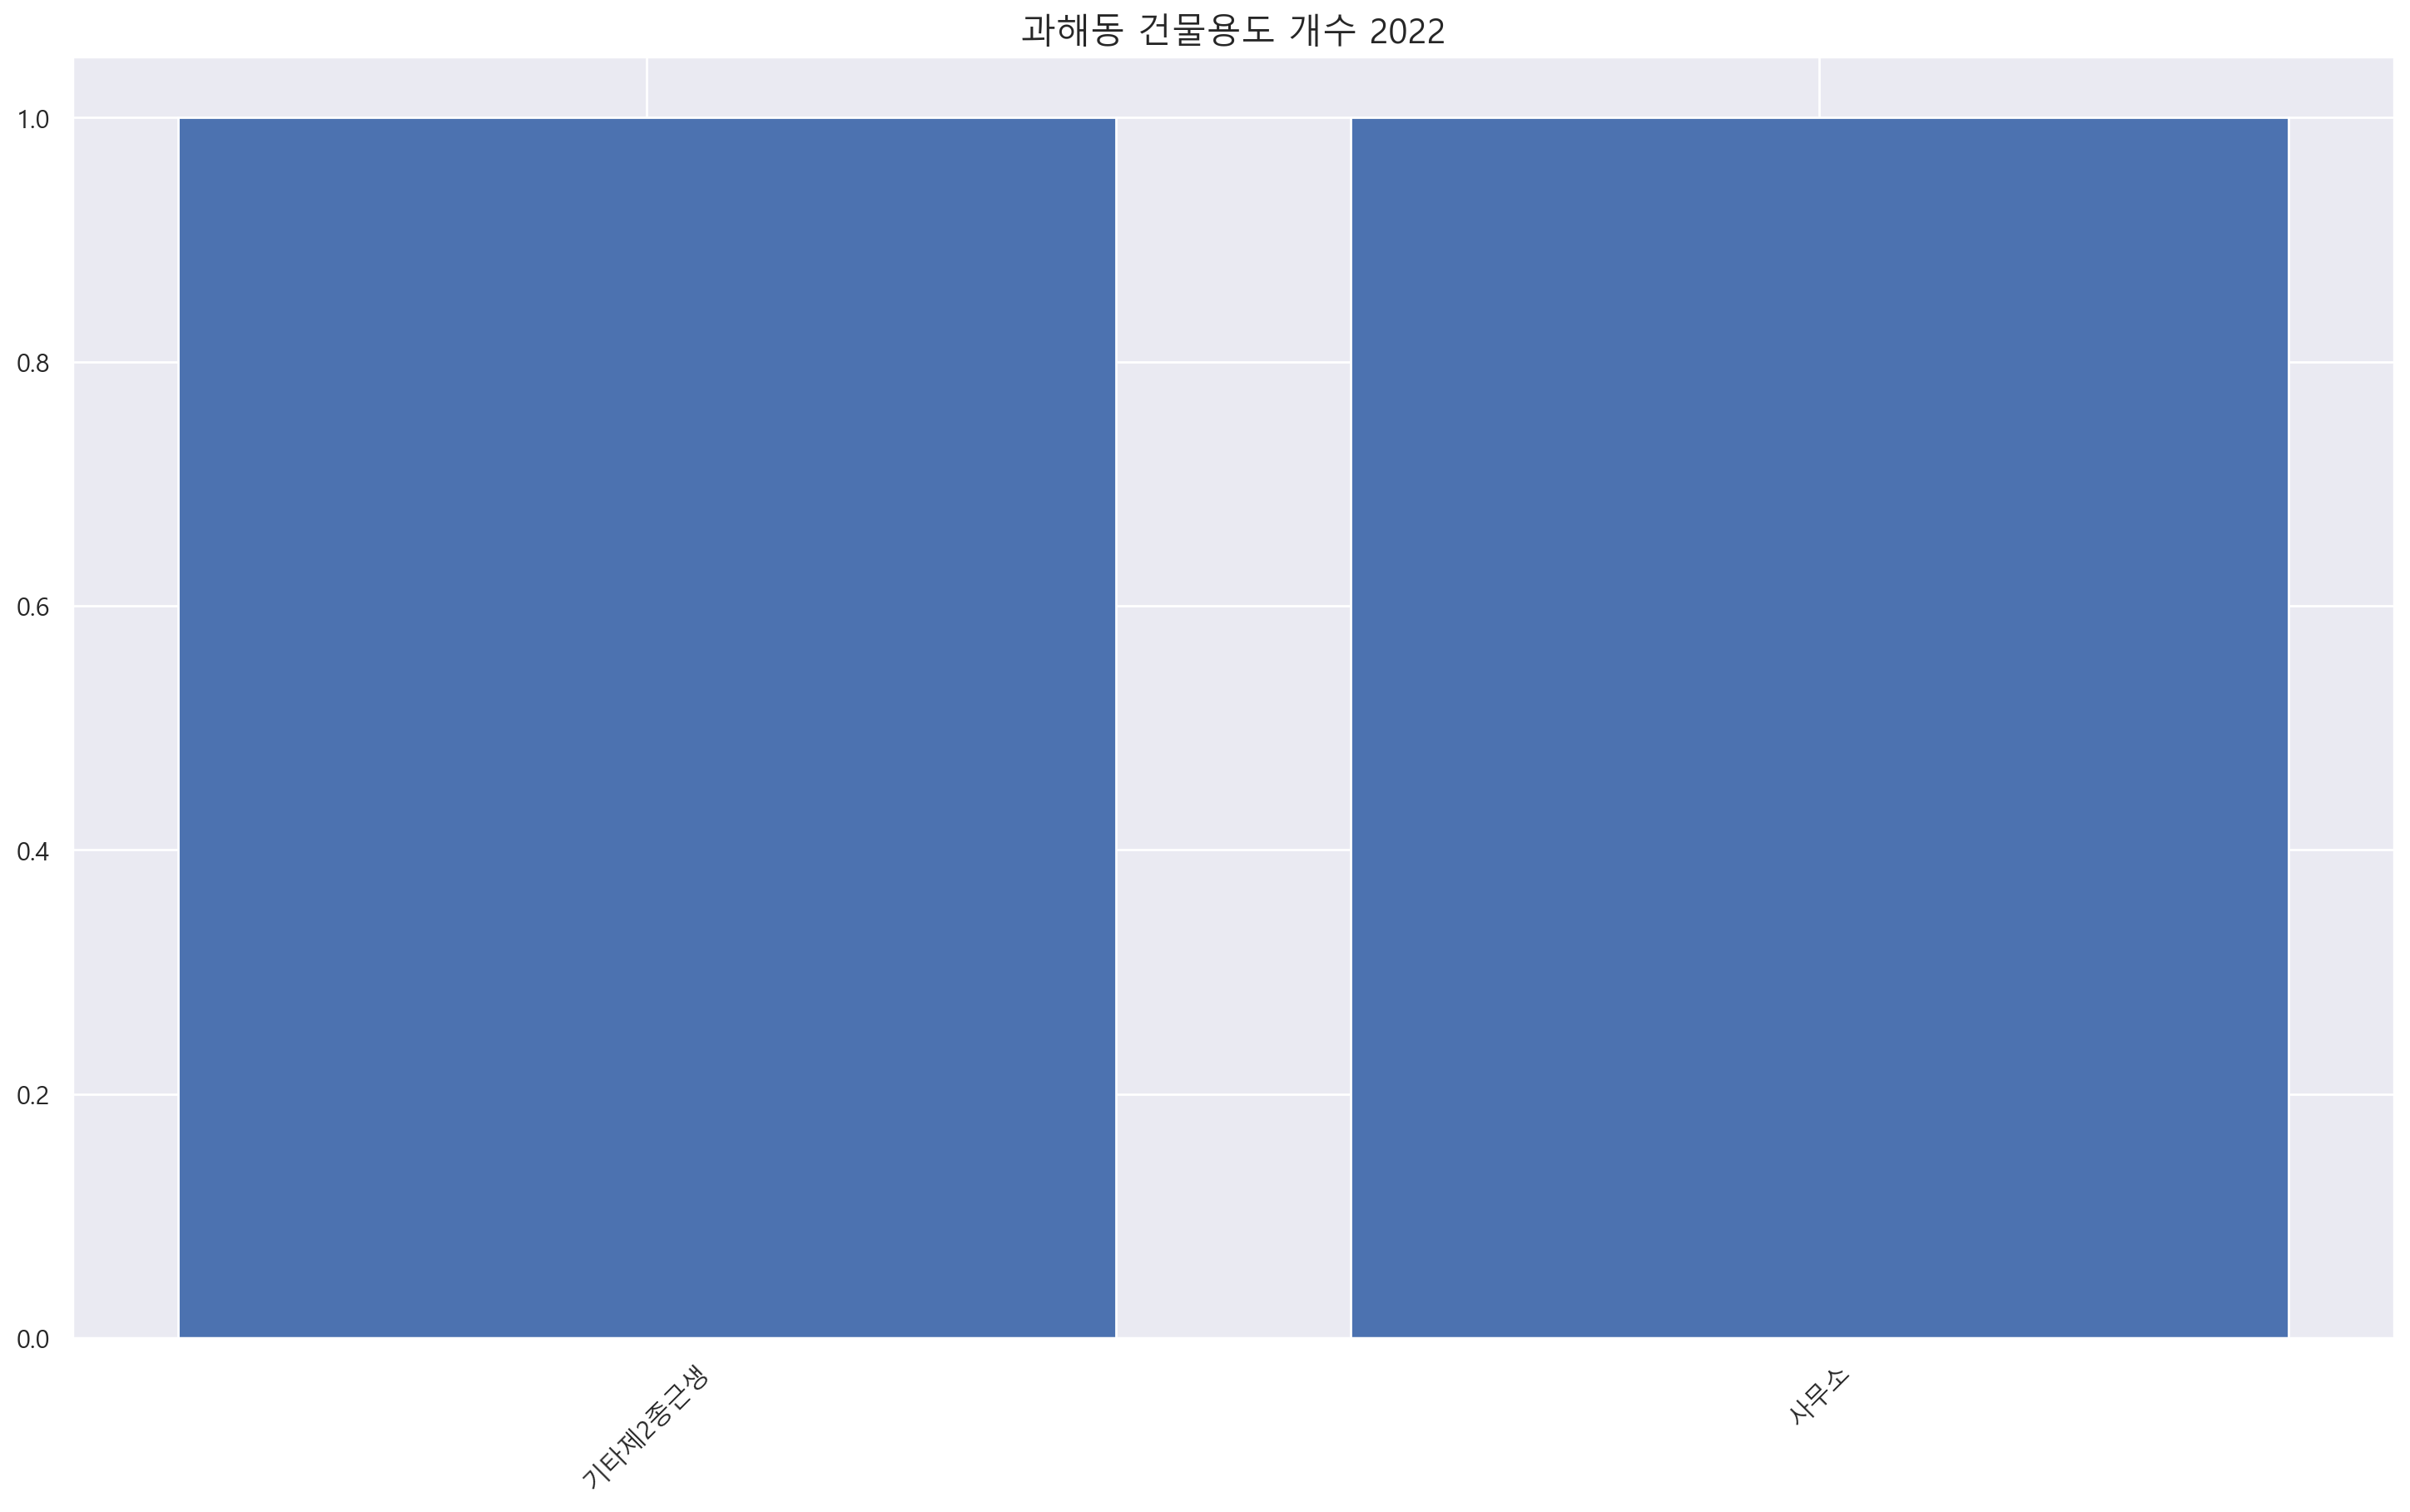

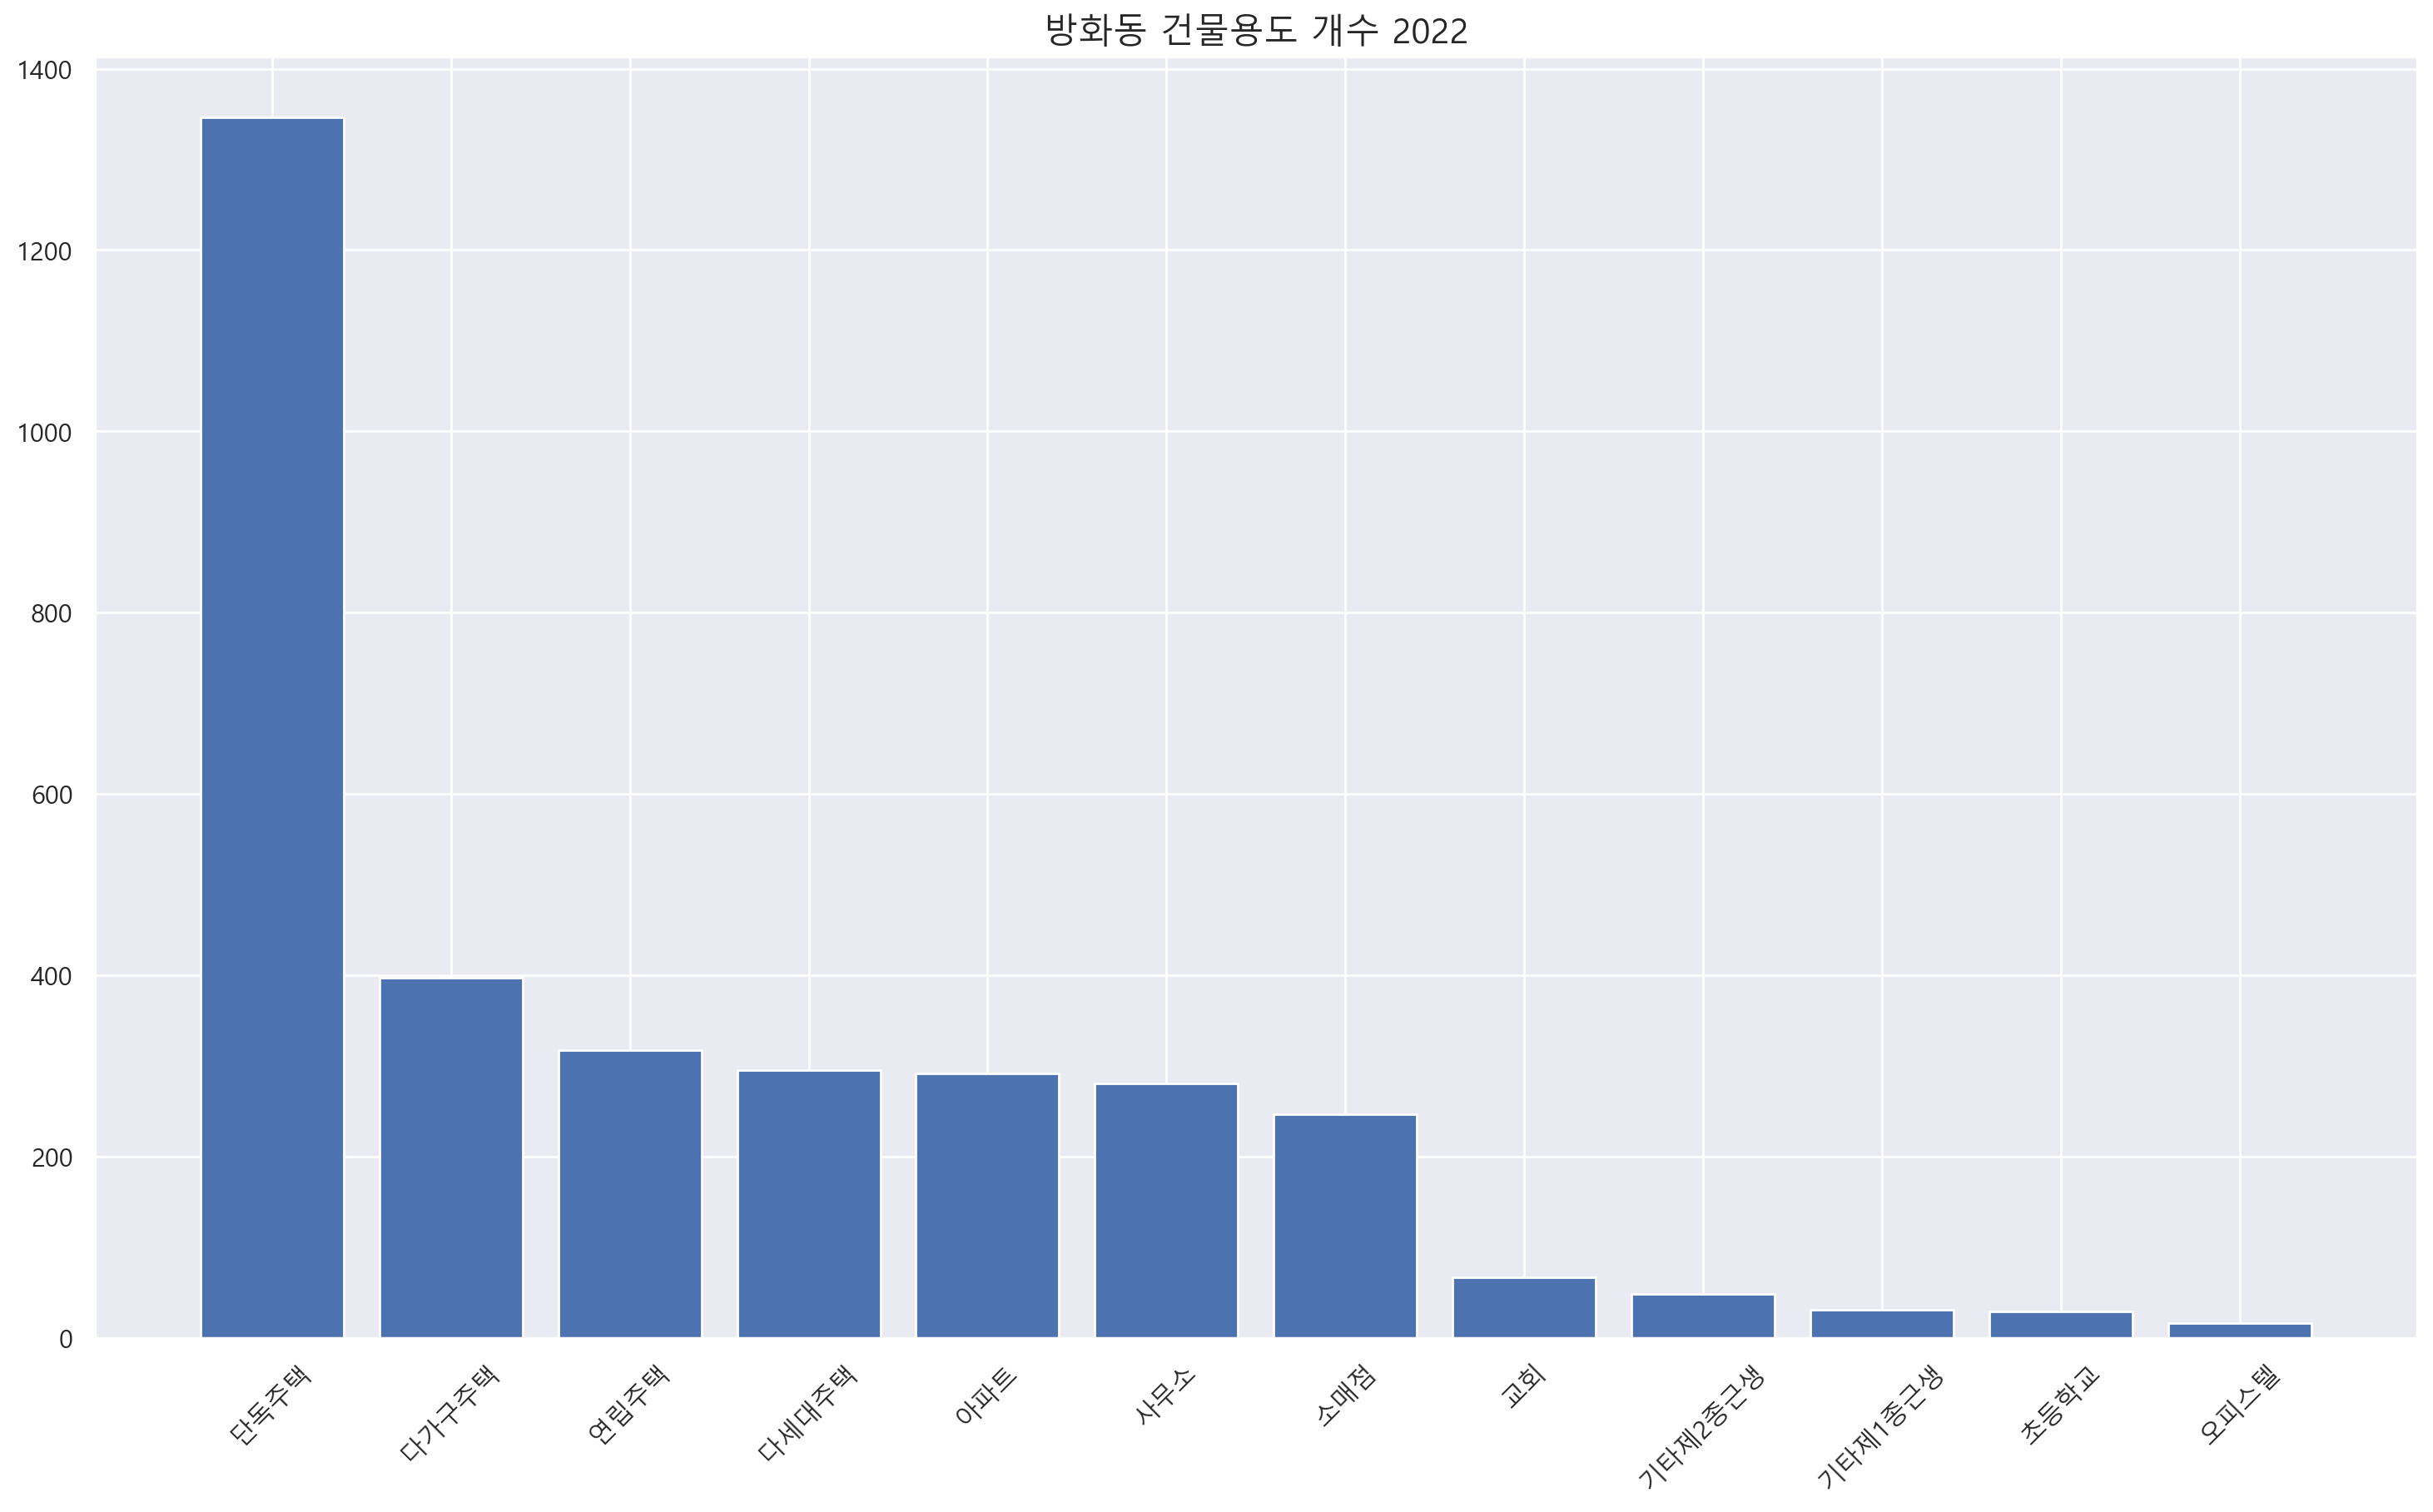

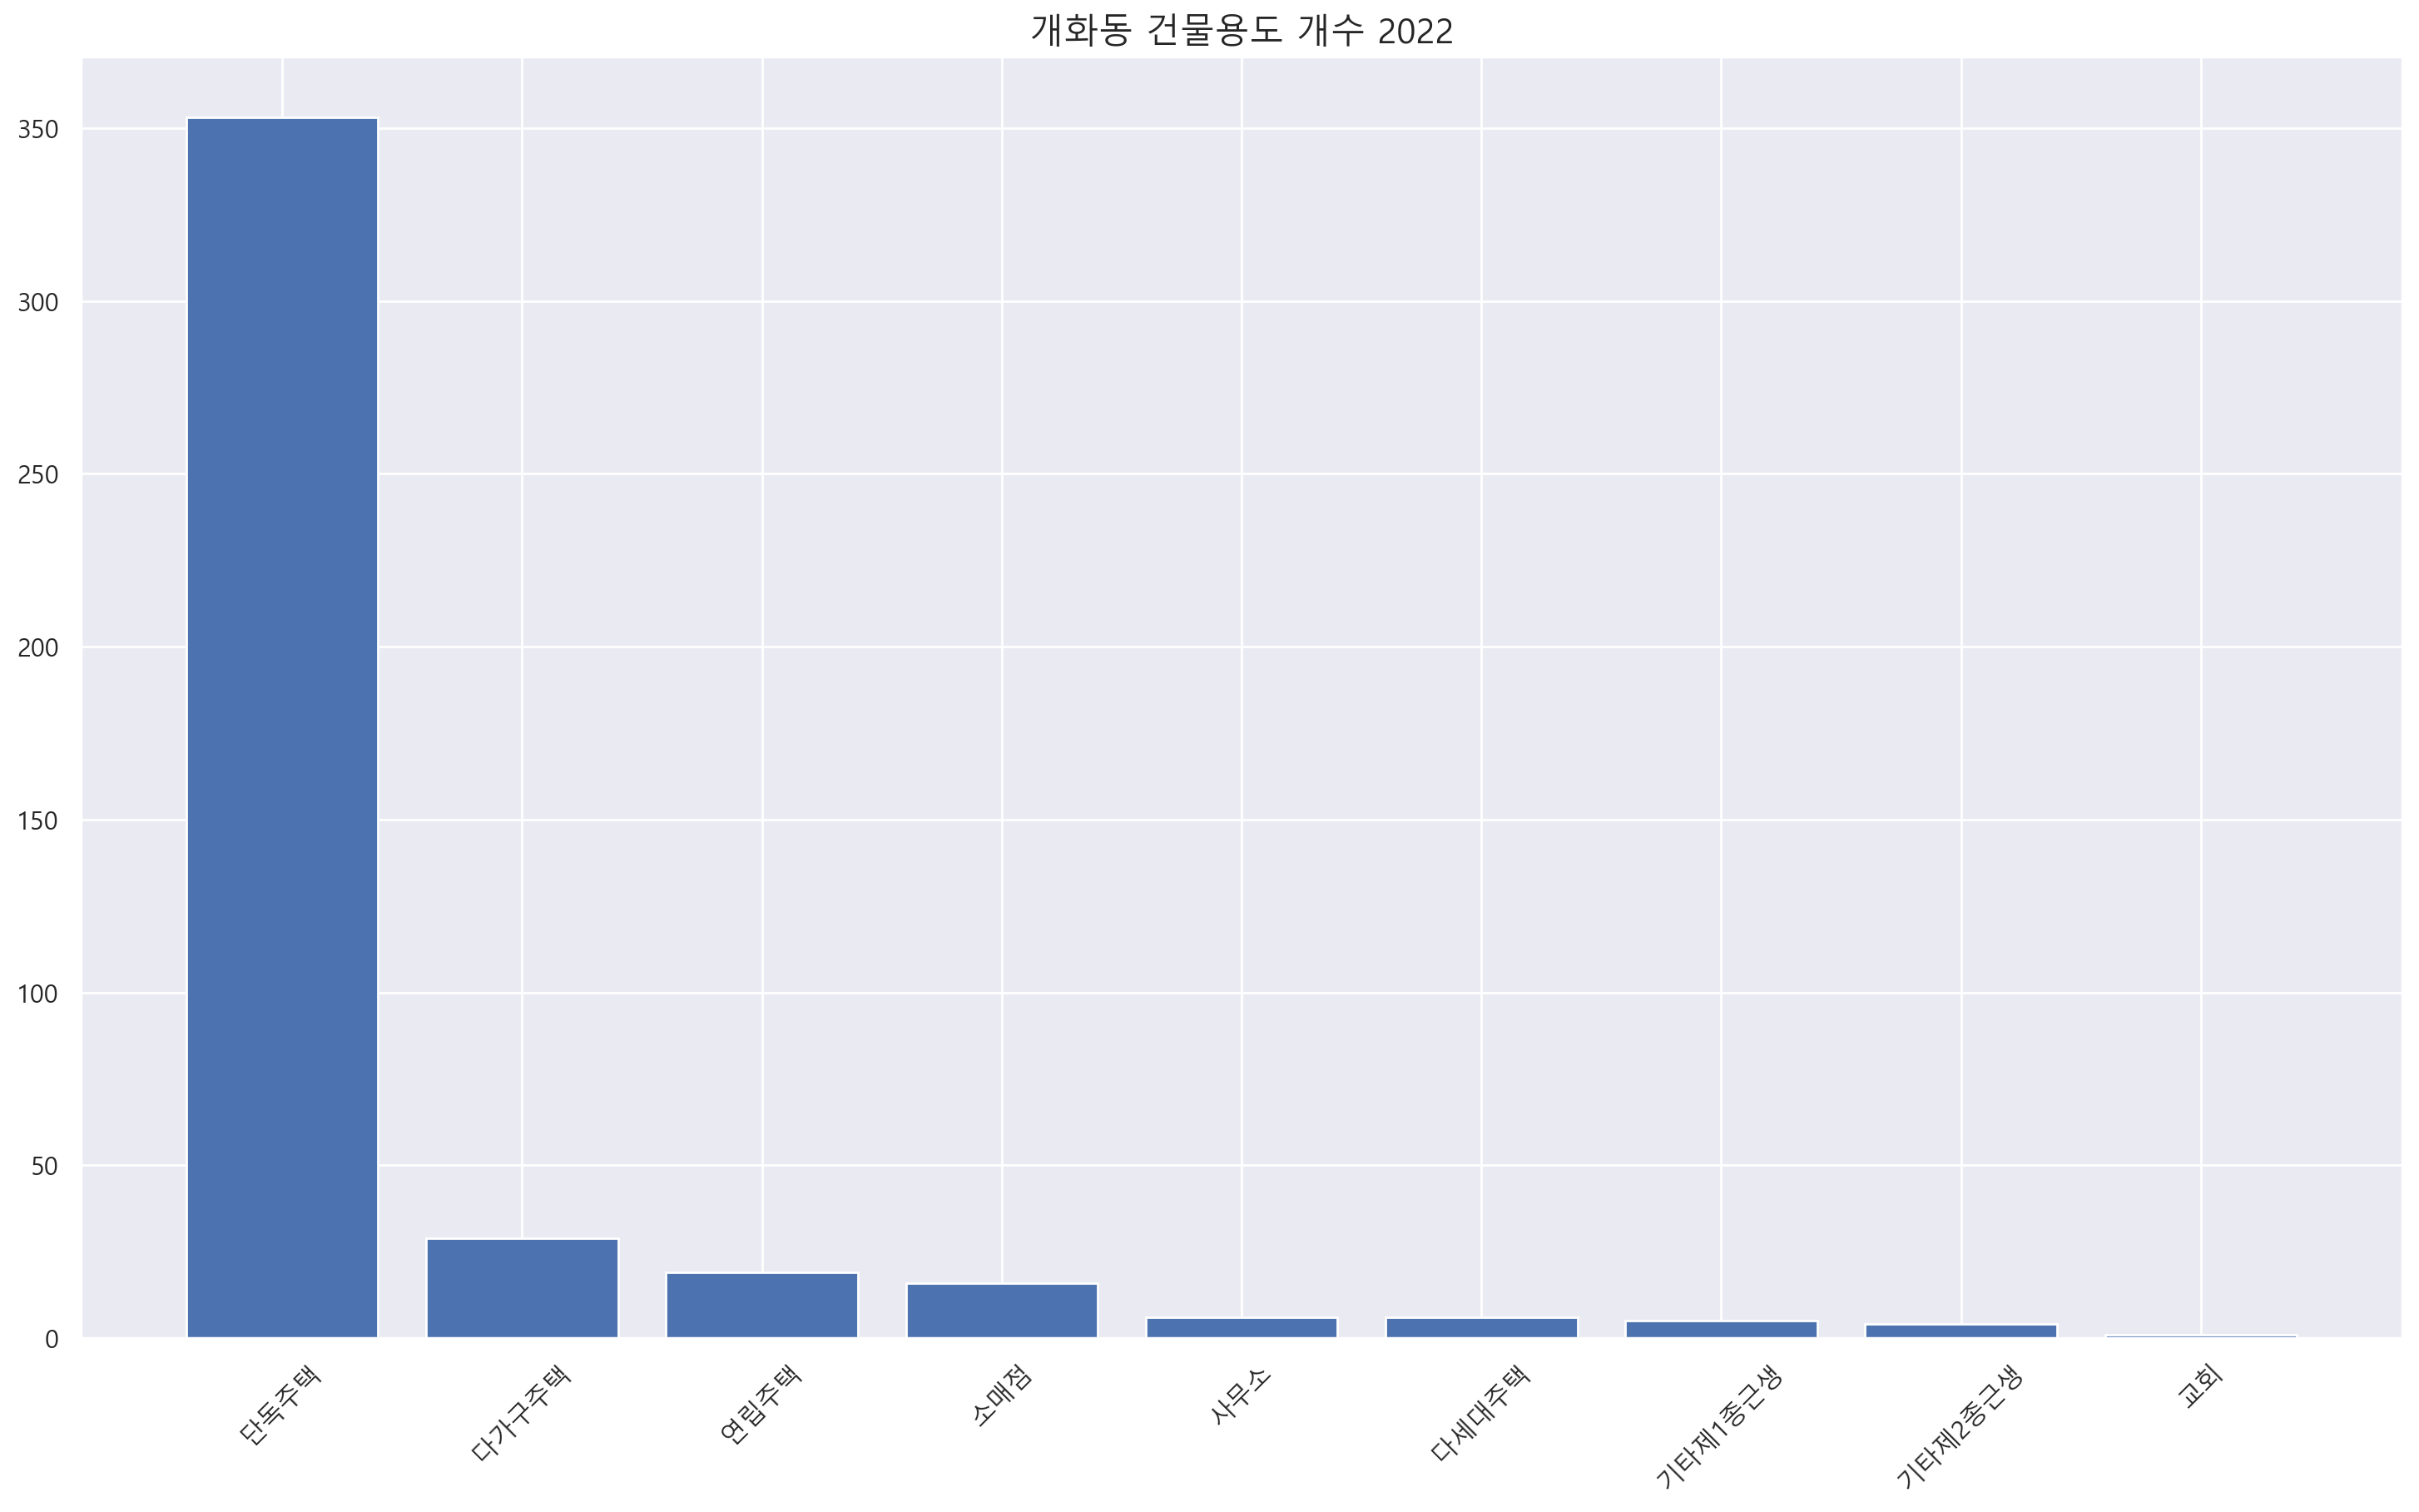

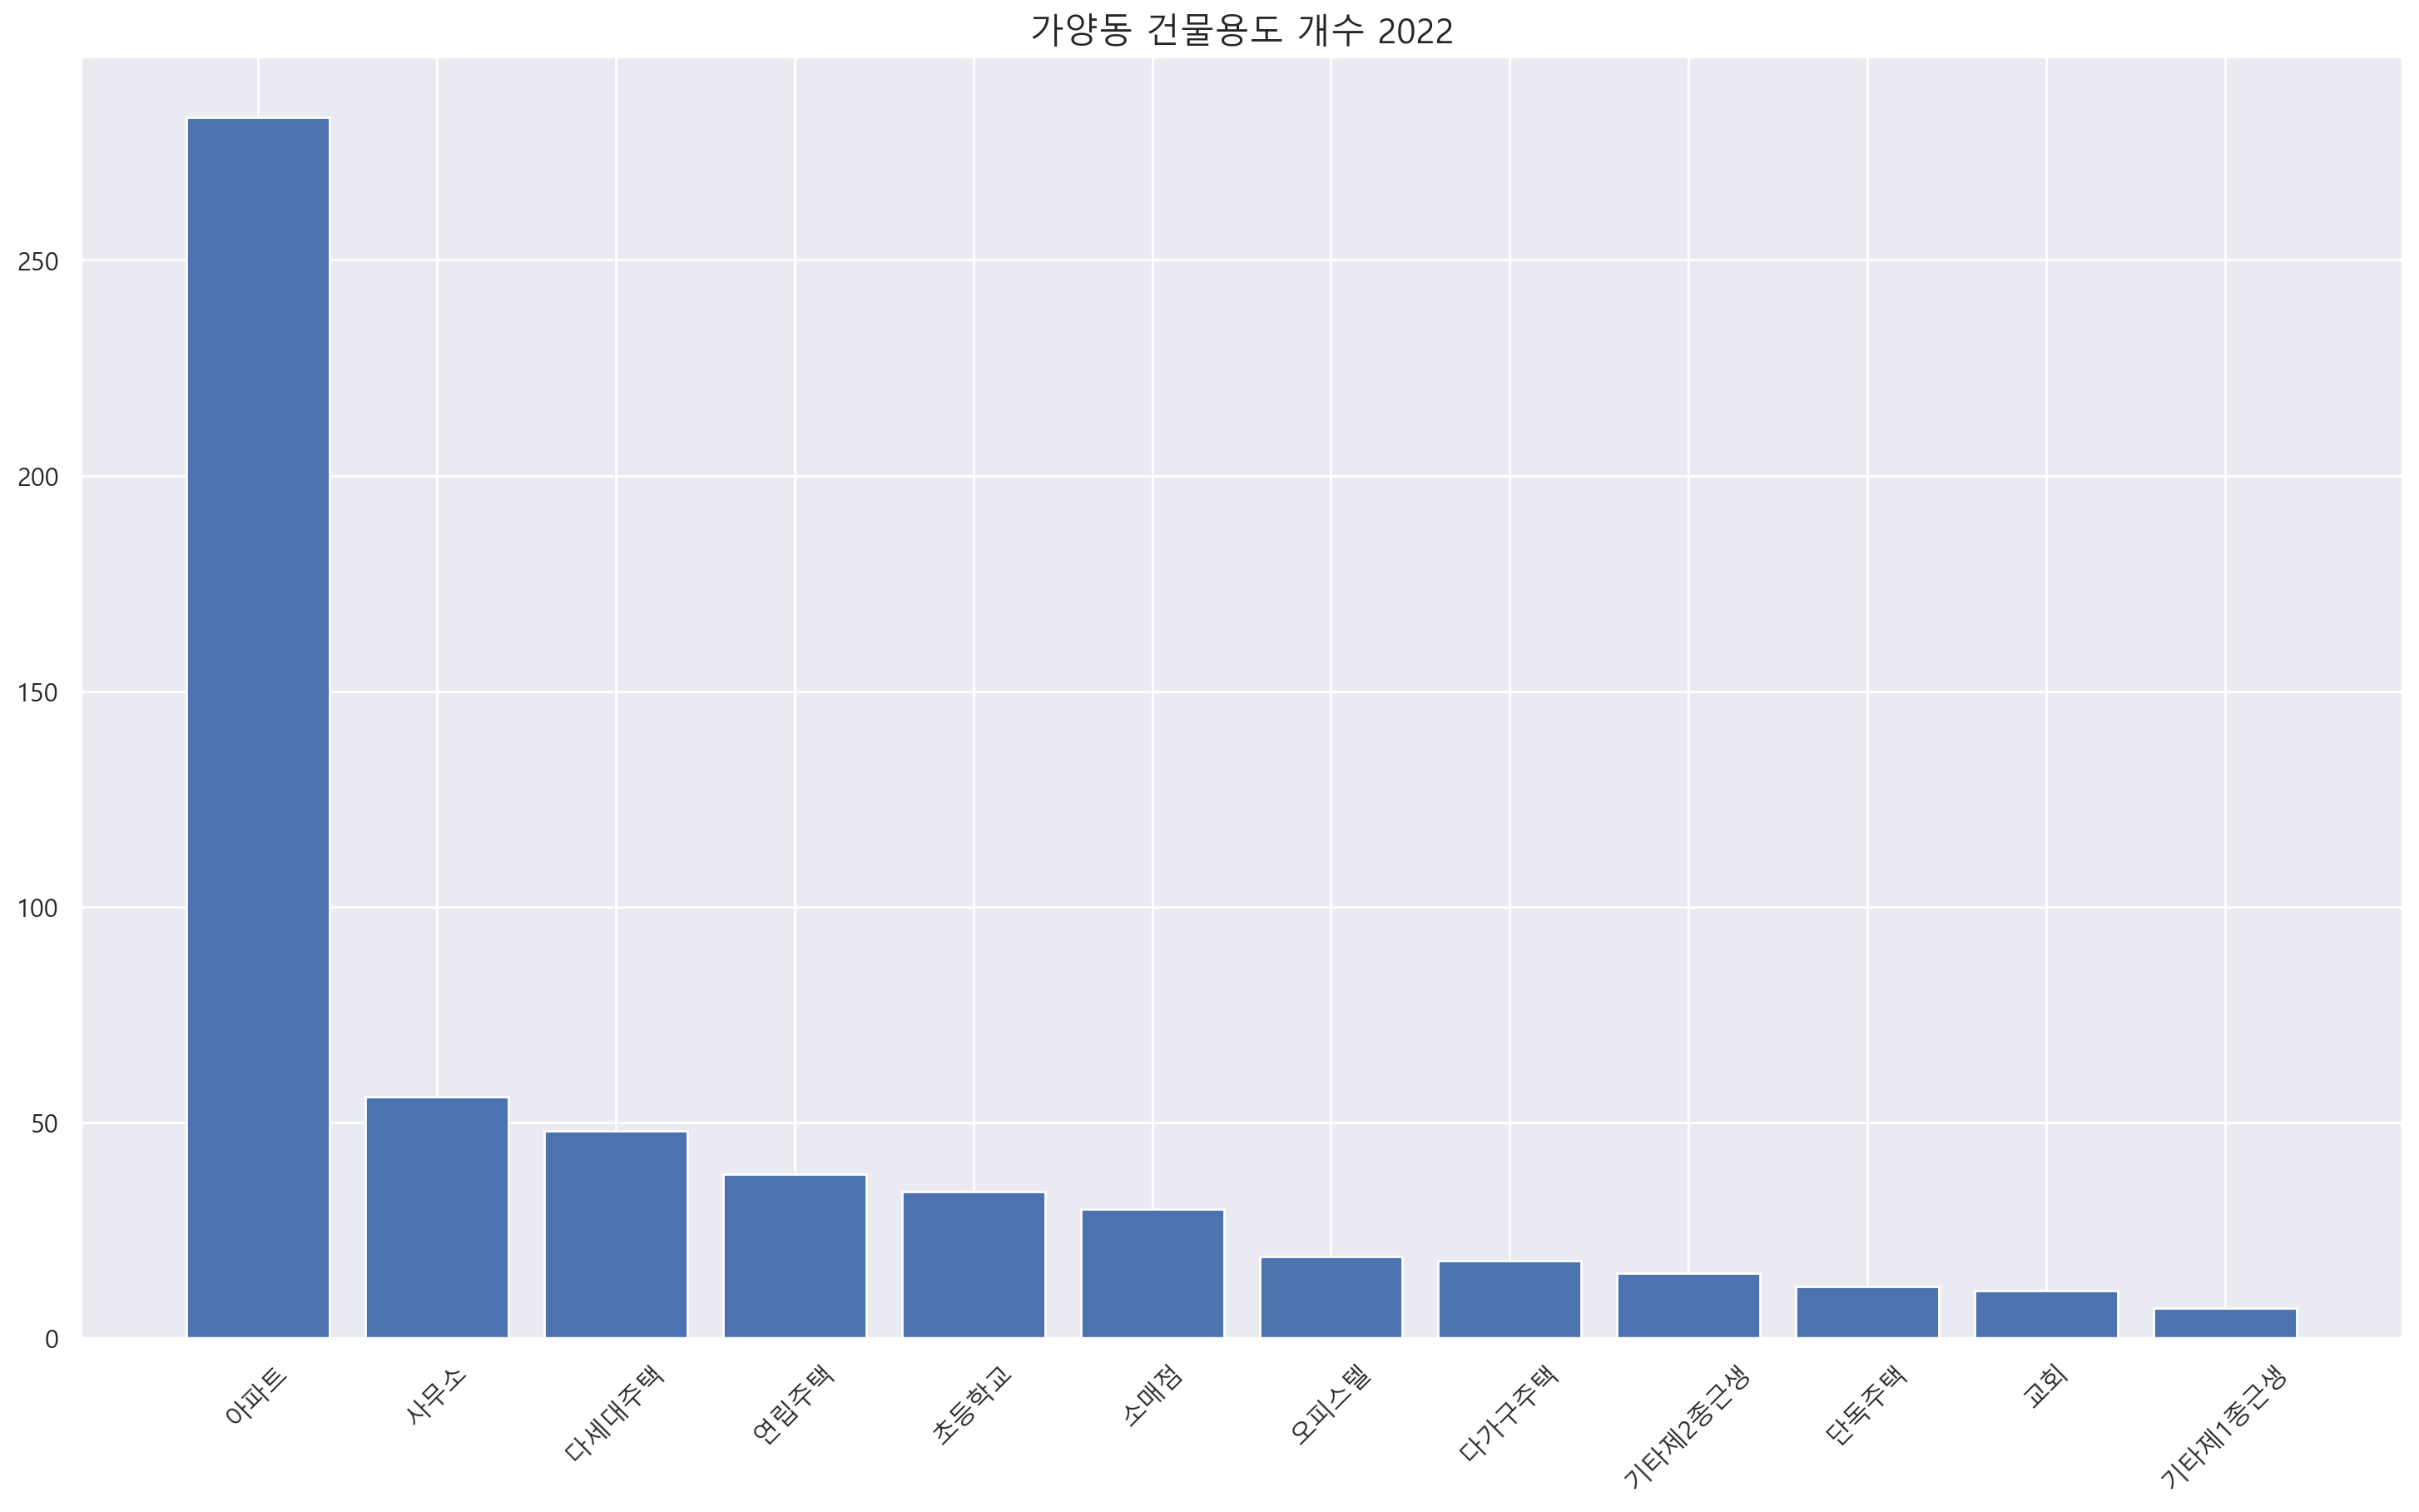

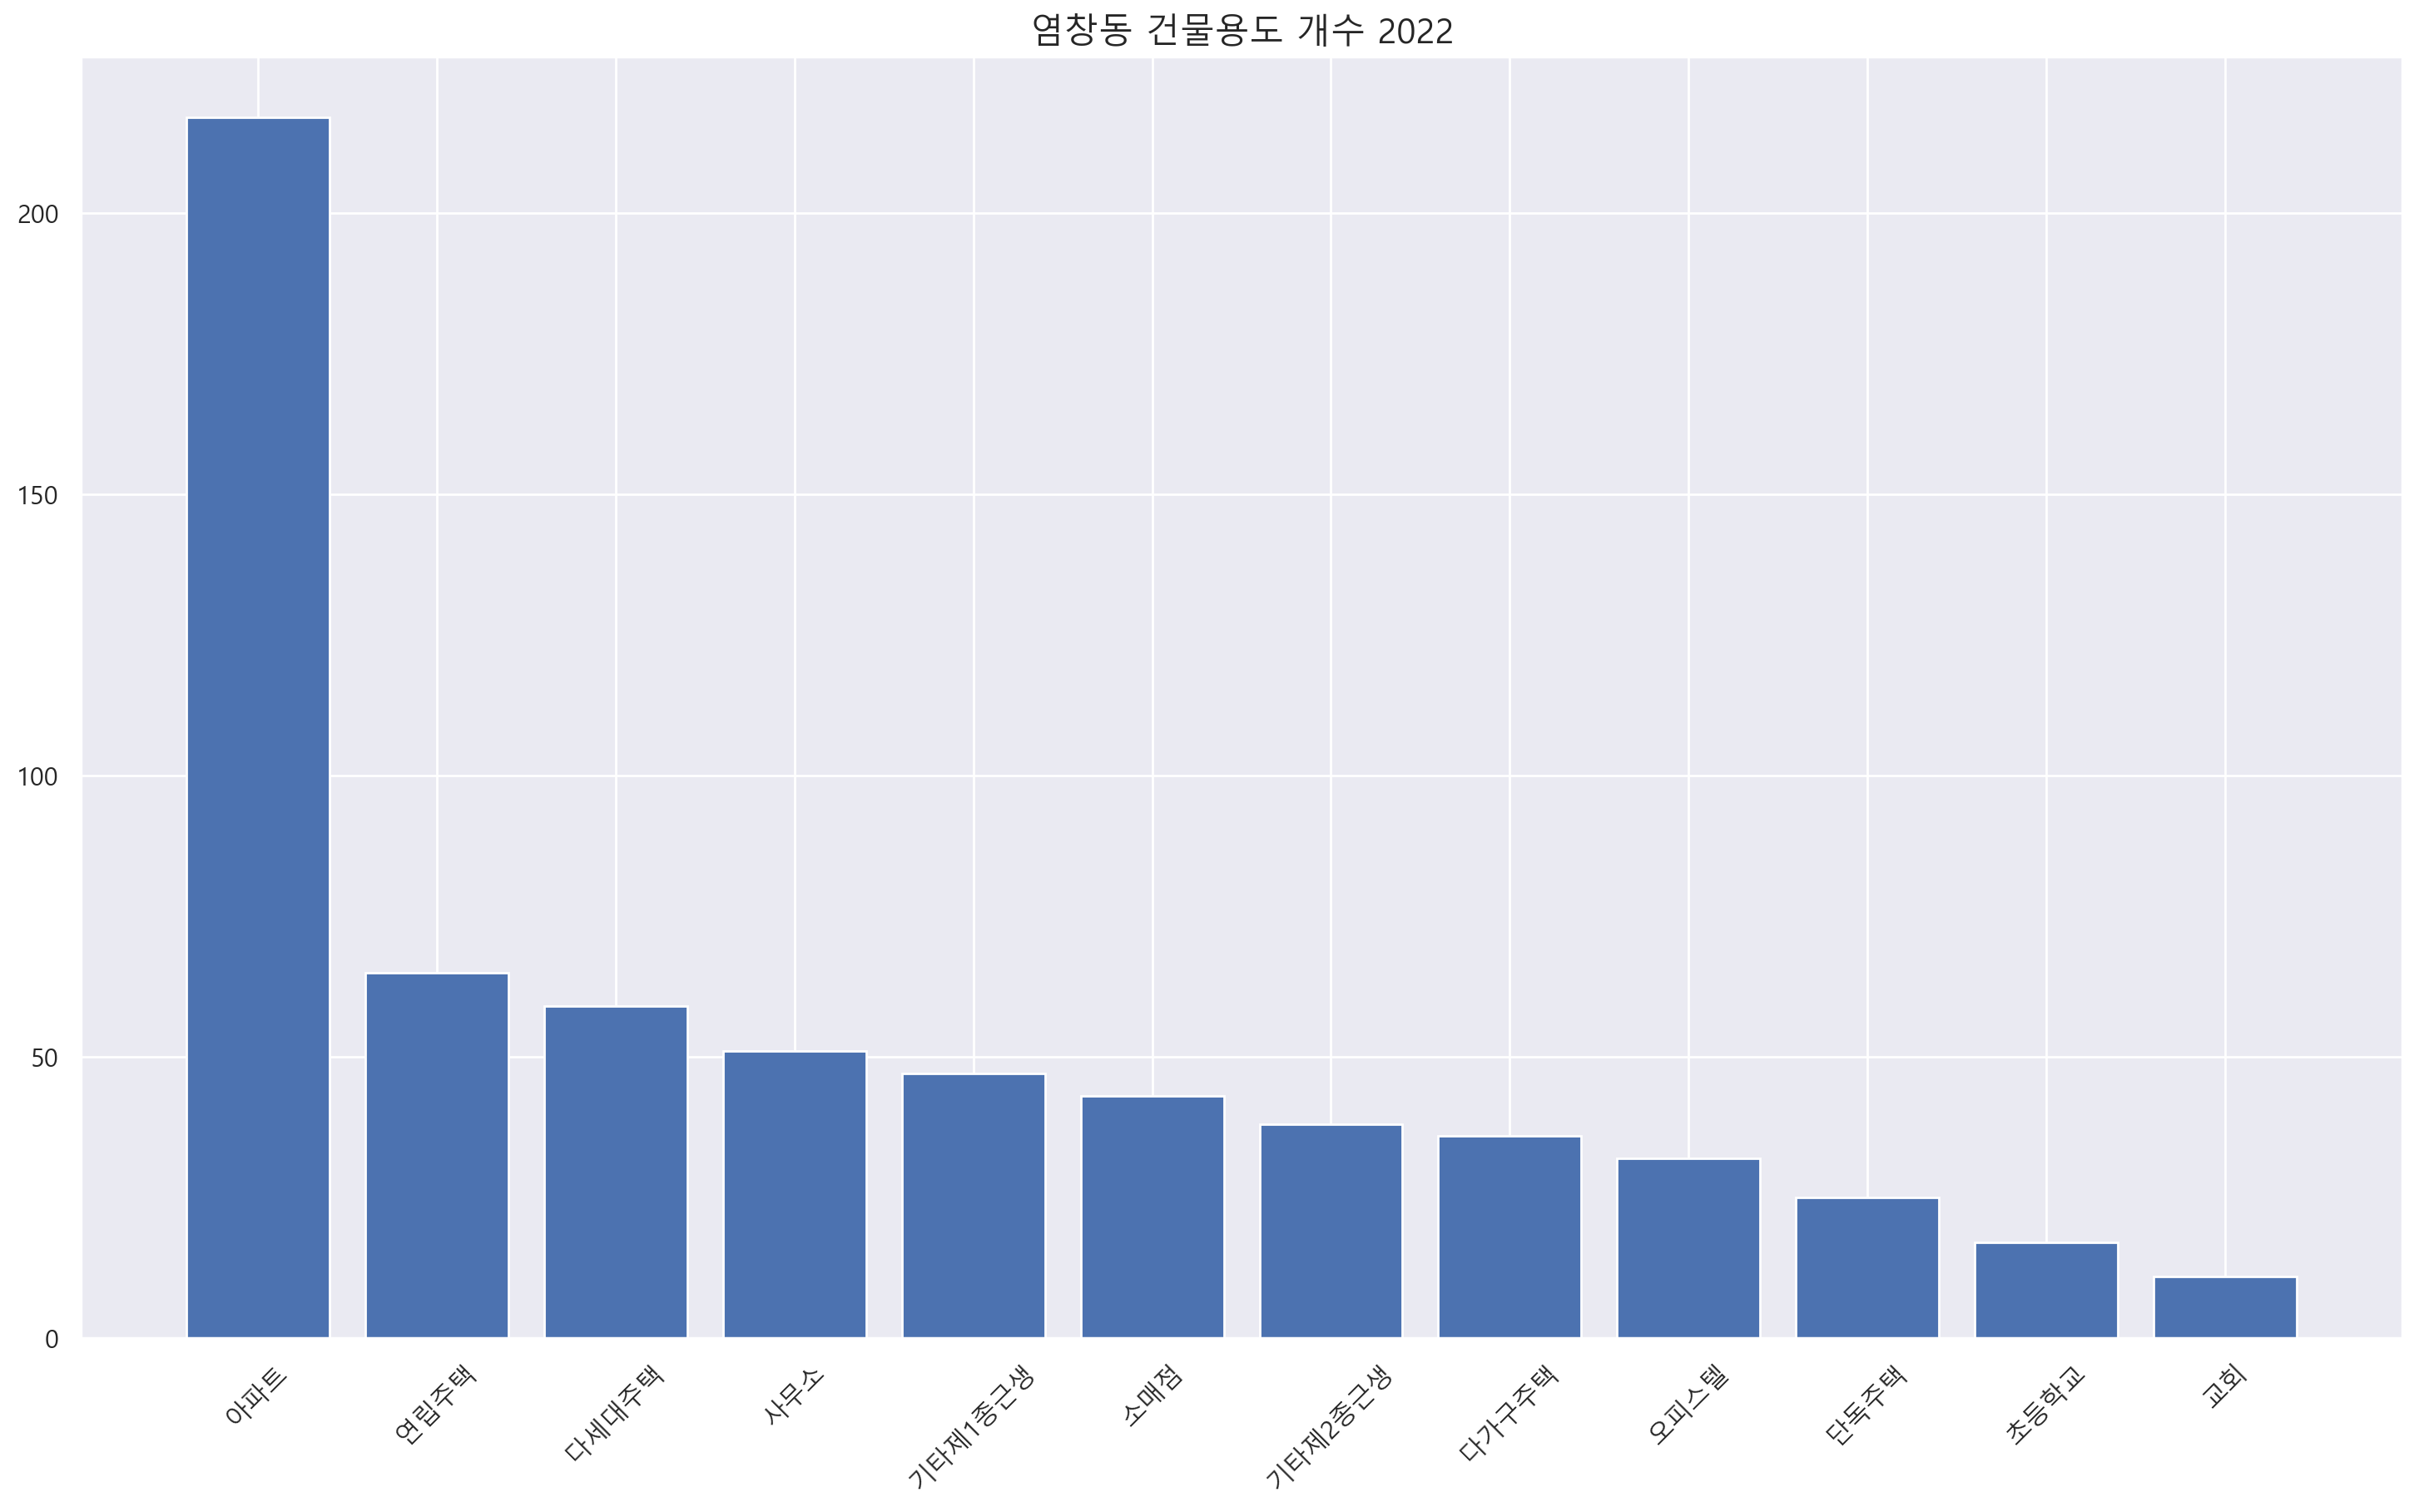

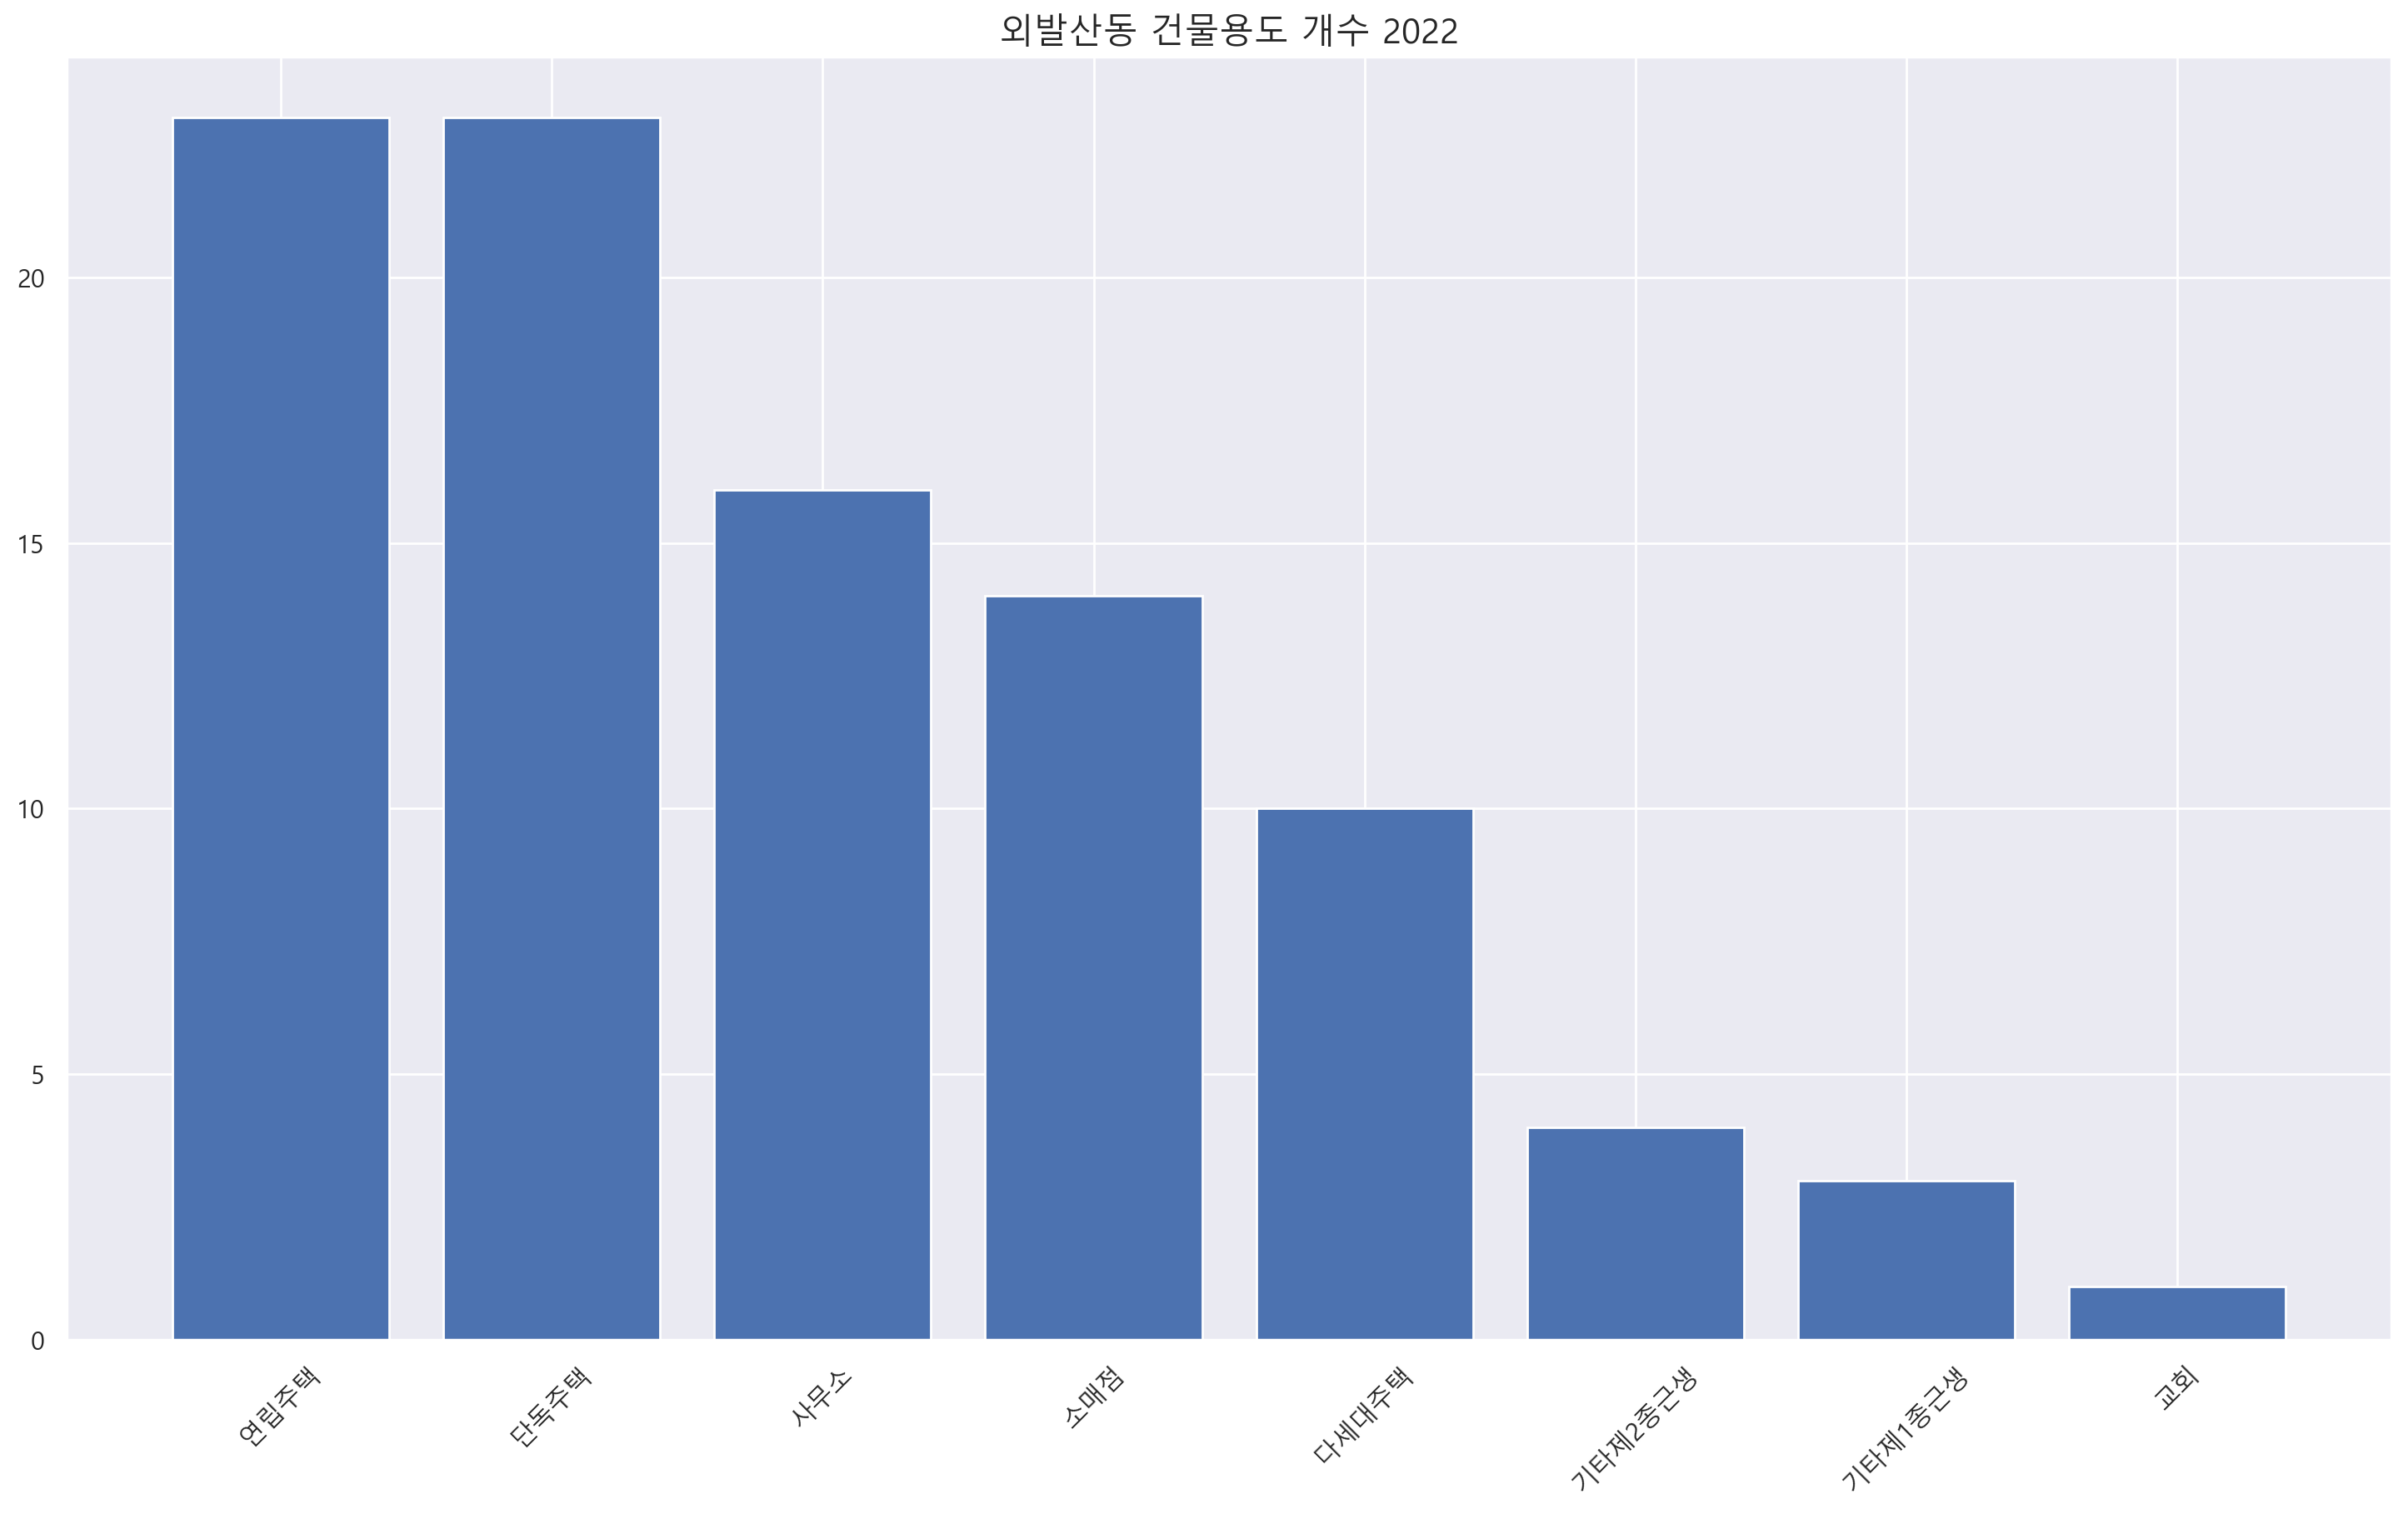

In [31]:
for dong in set(gangseo['읍면동명']):
    tmp_s = gangseo.loc[gangseo['읍면동명']== dong]['건물용도명'].value_counts().loc[gangseo['건물용도명'].value_counts() > 200]
    tmp_df = pd.DataFrame({'건물용도명':tmp_s.index, '개수': tmp_s.values})
    title = f'{dong} 건물용도 개수 2022'

    plt.figure(figsize=figure_size)
    plt.bar(tmp_df['건물용도명'], tmp_df['개수'])
    plt.xticks(rotation=45)
    plt.title(title, size=title_size)
    plt.savefig(f'../../img/건물/동별 건물 용도/{title}.png')
    plt.show()

#### 강서구 지상층수별 개수

In [32]:
def count_plot(df, col):
    tmp_s = df[col].value_counts()
    tmp_df = pd.DataFrame({col:tmp_s.index, '개수': tmp_s.values})

    sns.barplot(y='개수', x=col, data=tmp_df)
    plt.title(f'강서구 {col}별 개수')
    plt.show()

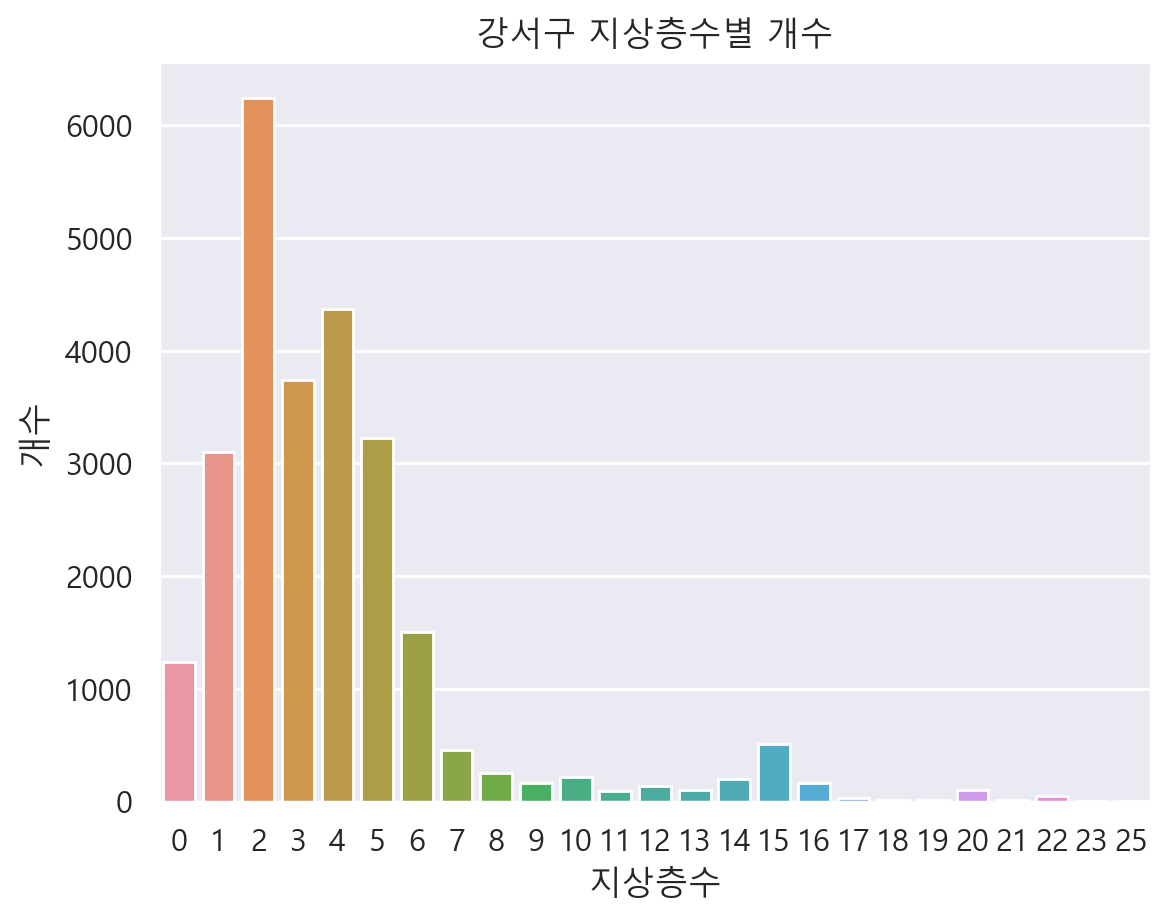

In [33]:
count_plot(gangseo, '지상층수')

#### 강서구 지하층수별 개수

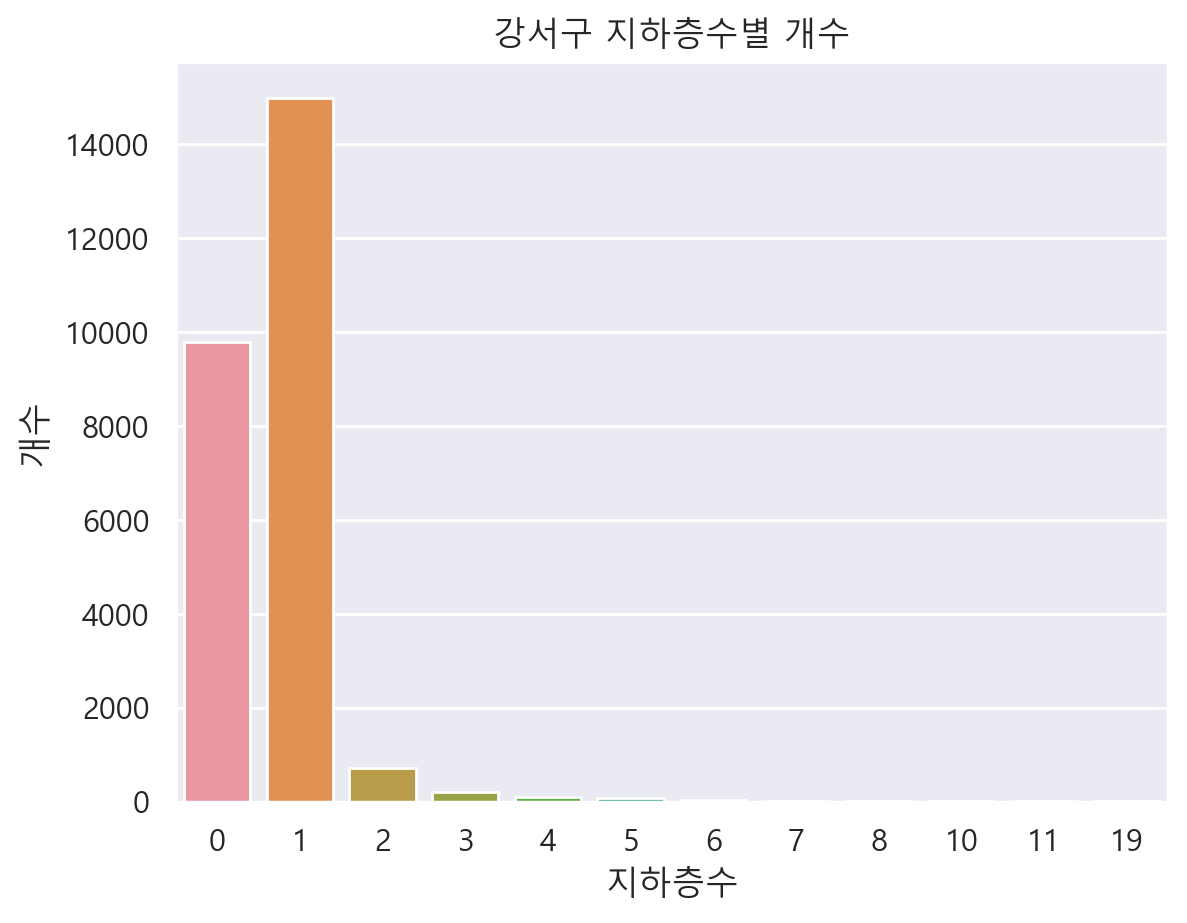

In [34]:
count_plot(gangseo, '지하층수')

#### 강서구 연도별 건물 개수

In [35]:
gangseo['고시일자'] = pd.to_datetime(gangseo['고시일자'], format='%Y-%m-%d')

In [36]:
gangseo['고시년도'] = gangseo['고시일자'].dt.year

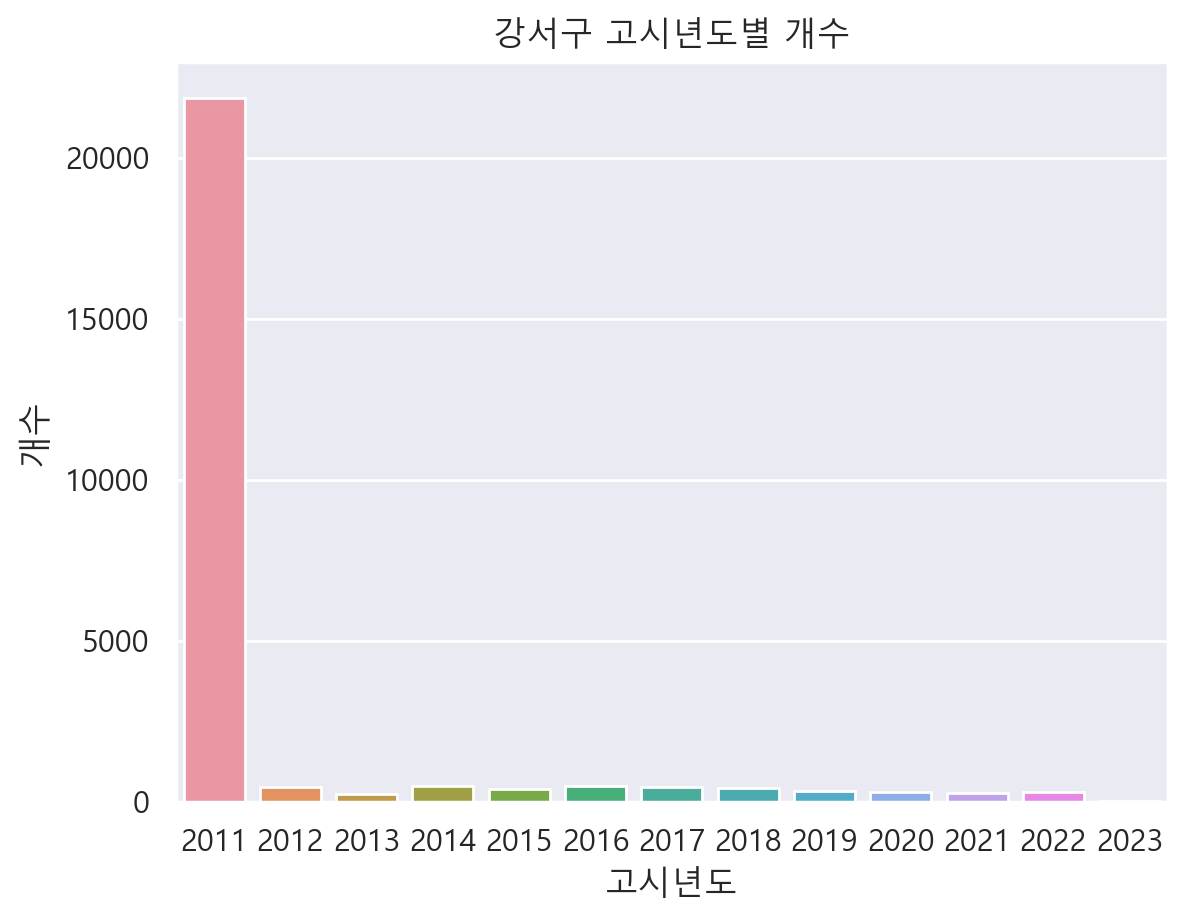

In [37]:
count_plot(gangseo, '고시년도')